In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import yfinance as yf
import datetime as dt

tickers = ['AAPL','TSLA', 'NKE', 'NFLX']

weights = np.array([.25, .3, .15, .3])

initial_investment = 1000000

data = yf.download(tickers, start="2020-01-01", end=dt.date.today())['Close']

returns = data.pct_change()
returns_df = pd.DataFrame(returns)

print('\n', returns_df.tail())

[*********************100%%**********************]  4 of 4 completed


 Ticker          AAPL      NFLX       NKE      TSLA
Date                                              
2024-05-08  0.001864  0.005726 -0.002026 -0.017378
2024-05-09  0.010014  0.004299 -0.002137 -0.015739
2024-05-10 -0.008235 -0.001993 -0.026234 -0.020352
2024-05-13  0.017645  0.009364  0.019573  0.020300
2024-05-14  0.006173 -0.004752  0.000755  0.032928


In [3]:
print(data)

Ticker            AAPL        NFLX         NKE        TSLA
Date                                                      
2020-01-02   75.087502  329.809998  102.199997   28.684000
2020-01-03   74.357498  325.899994  101.919998   29.534000
2020-01-06   74.949997  335.829987  101.830002   30.102667
2020-01-07   74.597504  330.750000  101.779999   31.270666
2020-01-08   75.797501  339.260010  101.550003   32.809334
...                ...         ...         ...         ...
2024-05-08  182.740005  609.469971   93.589996  174.720001
2024-05-09  184.570007  612.090027   93.389999  171.970001
2024-05-10  183.050003  610.869995   90.940002  168.470001
2024-05-13  186.279999  616.590027   92.720001  171.889999
2024-05-14  187.429993  613.659973   92.790001  177.550003

[1099 rows x 4 columns]


In [4]:
import plotly.express as px
px.line(data)

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [5]:
px.line(returns)

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [6]:
cov_matrix = returns_df.cov()

print(cov_matrix)

Ticker      AAPL      NFLX       NKE      TSLA
Ticker                                        
AAPL    0.000428  0.000290  0.000239  0.000439
NFLX    0.000290  0.000901  0.000218  0.000466
NKE     0.000239  0.000218  0.000476  0.000302
TSLA    0.000439  0.000466  0.000302  0.001793


In [7]:
avg_returns= returns.mean()
avg_returns

Ticker
AAPL    0.001047
NFLX    0.001033
NKE     0.000149
TSLA    0.002556
dtype: float64

In [8]:
avg_rets = returns_df.mean()

port_mean = avg_rets.dot(weights)

port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

mean_investment = (1+port_mean) * initial_investment

stdev_investment = initial_investment * port_stdev

In [9]:
conf_level1 = 0.05

from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [10]:
var_1d1 = initial_investment - cutoff1
var_1d1

36792.35500655533

1 day VaR @ 95% confidence: 36792.36
2 day VaR @ 95% confidence: 52032.25
3 day VaR @ 95% confidence: 63726.23
4 day VaR @ 95% confidence: 73584.71
5 day VaR @ 95% confidence: 82270.21
6 day VaR @ 95% confidence: 90122.5
7 day VaR @ 95% confidence: 97343.42
8 day VaR @ 95% confidence: 104064.49
9 day VaR @ 95% confidence: 110377.07
10 day VaR @ 95% confidence: 116347.64
11 day VaR @ 95% confidence: 122026.44
12 day VaR @ 95% confidence: 127452.46
13 day VaR @ 95% confidence: 132656.72
14 day VaR @ 95% confidence: 137664.39
15 day VaR @ 95% confidence: 142496.18


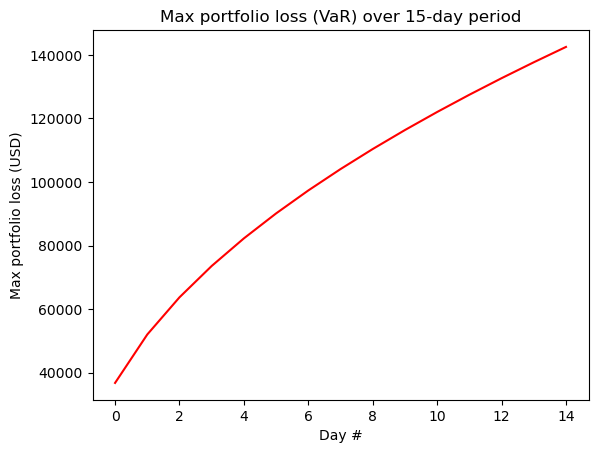

In [11]:
import matplotlib.pyplot as plt
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")

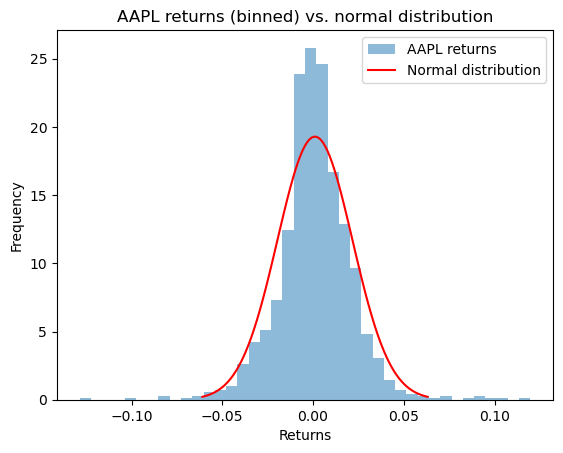

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.hist(returns['AAPL'], bins=40, density=True, histtype="stepfilled", alpha=0.5, label='AAPL returns')

aapl_mean = returns['AAPL'].mean()
aapl_stdev = returns['AAPL'].std()

x = np.linspace(aapl_mean - 3*aapl_stdev, aapl_mean + 3*aapl_stdev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, aapl_mean, aapl_stdev), "r", label='Normal distribution')

plt.title("AAPL returns (binned) vs. normal distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")

plt.legend()

plt.show()

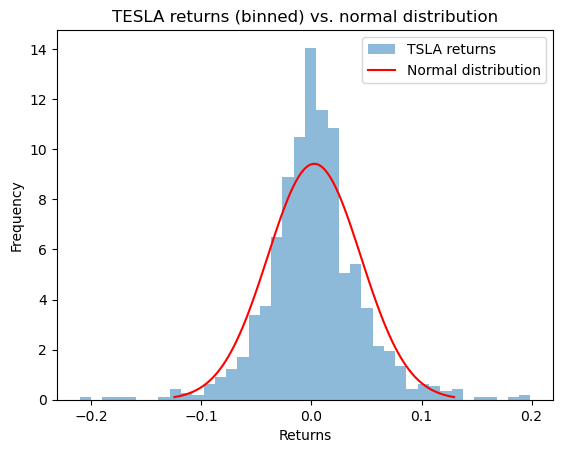

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.hist(returns['TSLA'], bins=40, density=True, histtype="stepfilled", alpha=0.5, label='TSLA returns')

aapl_mean = returns['TSLA'].mean()
aapl_stdev = returns['TSLA'].std()

x = np.linspace(aapl_mean - 3*aapl_stdev, aapl_mean + 3*aapl_stdev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, aapl_mean, aapl_stdev), "r", label='Normal distribution')

plt.title("TESLA returns (binned) vs. normal distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")

plt.legend()

plt.show()

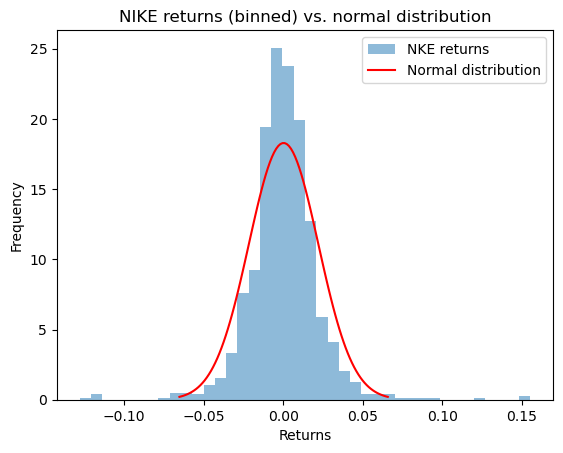

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.hist(returns['NKE'], bins=40, density=True, histtype="stepfilled", alpha=0.5, label='NKE returns')

aapl_mean = returns['NKE'].mean()
aapl_stdev = returns['NKE'].std()

x = np.linspace(aapl_mean - 3*aapl_stdev, aapl_mean + 3*aapl_stdev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, aapl_mean, aapl_stdev), "r", label='Normal distribution')

plt.title("NIKE returns (binned) vs. normal distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")

plt.legend()

plt.show()

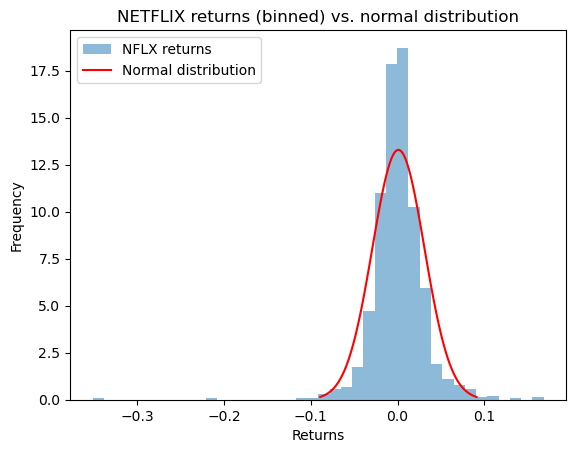

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.hist(returns['NFLX'], bins=40, density=True, histtype="stepfilled", alpha=0.5, label='NFLX returns')

aapl_mean = returns['NFLX'].mean()
aapl_stdev = returns['NFLX'].std()

x = np.linspace(aapl_mean - 3*aapl_stdev, aapl_mean + 3*aapl_stdev, 100)
plt.plot(x, scipy.stats.norm.pdf(x, aapl_mean, aapl_stdev), "r", label='Normal distribution')

plt.title("NETFLIX returns (binned) vs. normal distribution")
plt.xlabel("Returns")
plt.ylabel("Frequency")

plt.legend()

plt.show()

# VaR using GARCH and ARIMA models (in one year)

In [16]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('AAPL').history(period='1y', interval='1d')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)


VaR using GARCH model: h.1    177.702533
Name: (AAPL, 2024-05-14), dtype: float64
VaR using ARIMA model: 169.28119723982226


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/yahooquery/utils/__init__.py:1470: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/yahooquery/ticker.py:1333: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/User

In [17]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('TSLA').history(period='1y', interval='1d')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)

VaR using GARCH model: h.1    134.702955
Name: (TSLA, 2024-05-14), dtype: float64
VaR using ARIMA model: 156.92613323037037


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/yahooquery/utils/__init__.py:1470: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`

In [18]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('NKE').history(period='1y', interval='1d')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)


VaR using GARCH model: h.1    84.886266
Name: (NKE, 2024-05-14), dtype: float64
VaR using ARIMA model: 80.1529285216688


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/yahooquery/utils/__init__.py:1470: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/yahooquery/ticker.py:1333: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/User

In [19]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('NFLX').history(period='1y', interval='1d')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)

VaR using GARCH model: h.1    139.821759
Name: (NFLX, 2024-05-14), dtype: float64
VaR using ARIMA model: 574.4741448558801


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/yahooquery/utils/__init__.py:1470: FutureWarning:

'S' is deprecated and will be removed in a future version. Please use 's' instead of 'S'.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`

# VaR using GARCH and ARIMA models (in one day)

In [20]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('AAPL').history(period='7d', interval='1h')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)


VaR using GARCH model: h.1    174.051565
Name: (AAPL, 2024-05-14 16:00:00-04:00), dtype: float64
VaR using ARIMA model: 144.81302850322663


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/yahooquery/ticker.py:1333: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelman

In [21]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('TSLA').history(period='7d', interval='1h')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)


VaR using GARCH model: h.1    169.292258
Name: (TSLA, 2024-05-14 16:00:00-04:00), dtype: float64
VaR using ARIMA model: 134.55344974577739


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model

In [22]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('NKE').history(period='7d', interval='1h')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)

VaR using GARCH model: h.1    92.403559
Name: (NKE, 2024-05-14 16:00:00-04:00), dtype: float64
VaR using ARIMA model: 71.15972440544873


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model

In [23]:
import numpy as np
import pandas as pd
from yahooquery import Ticker
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm

price = Ticker('NFLX').history(period='7d', interval='1h')['close']

garch_model = arch_model(price, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

garch_forecasts = garch_result.forecast(start=price.index[-1], horizon=1)

arima_model = ARIMA(price, order=(5,1,1))
arima_result = arima_model.fit()

arima_forecasts = arima_result.forecast(steps=1)

confidence_level = 0.05

garch_forecast_return = garch_forecasts.mean.iloc[-1]
garch_volatility = garch_forecasts.residual_variance.iloc[-1]

garch_var = garch_forecast_return - np.sqrt(garch_volatility) * norm.ppf(1 - confidence_level)

arima_forecast_return = arima_forecasts.iloc[0]

arima_var = arima_forecast_return - arima_result.resid.std() * norm.ppf(1 - confidence_level)

print("VaR using GARCH model:", garch_var)
print("VaR using ARIMA model:", arima_var)

VaR using GARCH model: h.1    607.699213
Name: (NFLX, 2024-05-14 16:00:00-04:00), dtype: float64
VaR using ARIMA model: 476.57002827248476


/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/Users/pavelmanyakin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model

# GAN

In [24]:
ticker_symbol = 'TSLA'

data = yf.download(ticker_symbol, start="2020-01-01", end=dt.date.today())

print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   28.299999   28.713333   28.114000   28.684000   28.684000   
2020-01-03   29.366667   30.266666   29.128000   29.534000   29.534000   
2020-01-06   29.364668   30.104000   29.333332   30.102667   30.102667   
2020-01-07   30.760000   31.441999   30.224001   31.270666   31.270666   
2020-01-08   31.580000   33.232666   31.215334   32.809334   32.809334   
...                ...         ...         ...         ...         ...   
2024-05-08  171.589996  176.059998  170.149994  174.720001  174.720001   
2024-05-09  175.009995  175.619995  171.369995  171.970001  171.970001   
2024-05-10  173.050003  173.059998  167.750000  168.470001  168.470001   
2024-05-13  170.000000  175.399994  169.000000  171.889999  171.889999   
2024-05-14  174.500000  179.490005  174.070007  177.550003  177.550003   

               Volume  
Date         

In [25]:
data['y'] = data['Close'].copy()

x = data.iloc[:, :6].values
y = data.iloc[:, 6].values


split = int(data.shape[0]* 0.8)
train_x, test_x = x[: split, :], x[split:, :]
train_y, test_y = y[: split, ], y[split: , ]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))

trainX: (879, 6) trainY: (879,)
testX: (220, 6) testY: (220,)


In [26]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )
        
        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )       
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        ) 

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [27]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
model = VAE([6, 100, 100, 100, 10], 10)

[1/300] Loss: 177.87233924865723
[2/300] Loss: 175.26395225524902
[3/300] Loss: 172.48507690429688
[4/300] Loss: 169.58910942077637
[5/300] Loss: 166.5636329650879
[6/300] Loss: 163.46878242492676
[7/300] Loss: 160.48802947998047
[8/300] Loss: 157.65398597717285
[9/300] Loss: 154.873140335083
[10/300] Loss: 152.16035652160645
[11/300] Loss: 149.53945922851562
[12/300] Loss: 146.95821571350098
[13/300] Loss: 144.3991413116455
[14/300] Loss: 141.88216018676758
[15/300] Loss: 139.45462608337402
[16/300] Loss: 137.06079483032227
[17/300] Loss: 134.5565013885498
[18/300] Loss: 131.97117233276367
[19/300] Loss: 129.31842803955078
[20/300] Loss: 126.62918853759766
[21/300] Loss: 123.95252513885498
[22/300] Loss: 121.3217658996582
[23/300] Loss: 118.76618576049805
[24/300] Loss: 116.30295372009277
[25/300] Loss: 113.93732833862305
[26/300] Loss: 111.6868200302124
[27/300] Loss: 109.56959342956543
[28/300] Loss: 107.5878553390503
[29/300] Loss: 105.76252269744873
[30/300] Loss: 104.088460922241

[253/300] Loss: 19.896871328353882
[254/300] Loss: 19.78457546234131
[255/300] Loss: 19.663880109786987
[256/300] Loss: 19.53267526626587
[257/300] Loss: 19.391703367233276
[258/300] Loss: 19.244969367980957
[259/300] Loss: 19.08822774887085
[260/300] Loss: 18.92816662788391
[261/300] Loss: 18.76434826850891
[262/300] Loss: 18.595041513442993
[263/300] Loss: 18.425272941589355
[264/300] Loss: 18.250577926635742
[265/300] Loss: 18.07742667198181
[266/300] Loss: 17.90587592124939
[267/300] Loss: 17.73806142807007
[268/300] Loss: 17.57108163833618
[269/300] Loss: 17.411012887954712
[270/300] Loss: 17.25664734840393
[271/300] Loss: 17.112680912017822
[272/300] Loss: 16.974210262298584
[273/300] Loss: 16.84469223022461
[274/300] Loss: 16.729506492614746
[275/300] Loss: 16.624664068222046
[276/300] Loss: 16.53446626663208
[277/300] Loss: 16.454062700271606
[278/300] Loss: 16.387266635894775
[279/300] Loss: 16.33607292175293
[280/300] Loss: 16.2992901802063
[281/300] Loss: 16.273163080215454


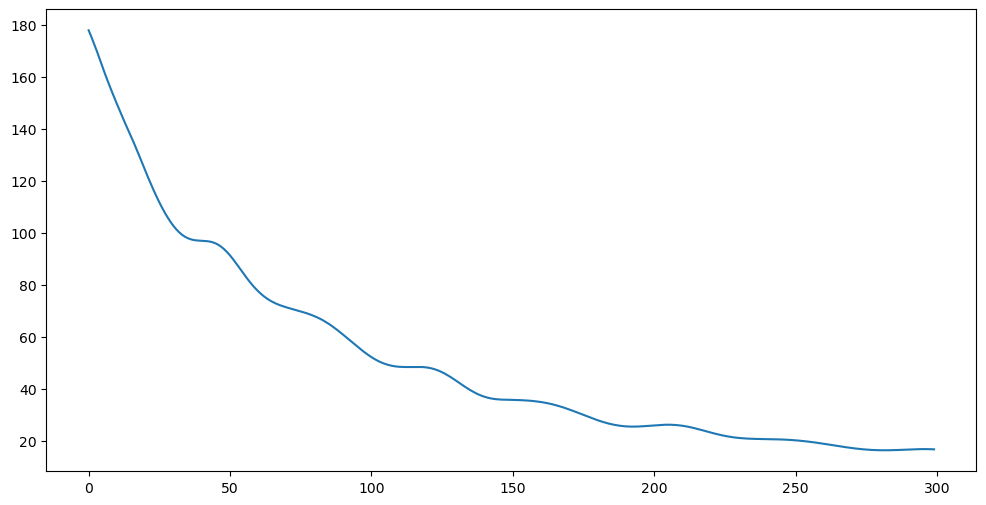

In [28]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
num_epochs = 300
learning_rate = 0.00003
model = model.to(device)   
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

hist = np.zeros(num_epochs) 
for epoch in range(num_epochs):
    total_loss = 0
    loss_ = []
    for (x, ) in train_loader:
        x = x.to(device)
        output, z, mu, logVar = model(x)
        kl_divergence = 0.5* torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
        loss = F.binary_cross_entropy(output, x) + kl_divergence
        loss.backward()
        optimizer.step()
        loss_.append(loss.item())
    hist[epoch] = sum(loss_)
    print('[{}/{}] Loss:'.format(epoch+1, num_epochs), sum(loss_))

plt.figure(figsize=(12, 6))
plt.plot(hist)

In [29]:
model.eval()
_, VAE_train_x, train_x_mu, train_x_var = model(torch.from_numpy(train_x).float().to(device))
_, VAE_test_x, test_x_mu, test_x_var = model(torch.from_numpy(test_x).float().to(device))

In [30]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

In [31]:
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)

In [32]:
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')


train_x: torch.Size([876, 3, 16]) train_y: torch.Size([876, 1]) train_y_gan: torch.Size([876, 4, 1])
test_x: torch.Size([217, 3, 16]) test_y: torch.Size([217, 1]) test_y_gan: torch.Size([217, 4, 1])


In [33]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 3, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 3, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

In [34]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

batch_size = 128
learning_rate = 0.00016
num_epochs = 165

trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

modelG = Generator(16).to(device)
modelD = Discriminator().to(device)

criterion = nn.BCELoss()
optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.0, 0.9))
optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.0, 0.9))

histG = np.zeros(num_epochs)
histD = np.zeros(num_epochs)
count = 0
for epoch in range(num_epochs):
    loss_G = []
    loss_D = []
    for (x, y) in trainDataloader:
        x = x.to(device)
        y = y.to(device)

        fake_data = modelG(x)
        fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

        dis_real_output = modelD(y)
        real_labels = torch.ones_like(dis_real_output).to(device)
        lossD_real = criterion(dis_real_output, real_labels)


        dis_fake_output = modelD(fake_data)
        fake_labels = torch.zeros_like(real_labels).to(device)
        lossD_fake = criterion(dis_fake_output, fake_labels)

        lossD = (lossD_real + lossD_fake)

        modelD.zero_grad()
        lossD.backward(retain_graph=True)
        optimizerD.step()
        loss_D.append(lossD.item())

        output_fake = modelD(fake_data)
        lossG = criterion(output_fake, real_labels)
        modelG.zero_grad()
        lossG.backward()
        optimizerG.step()
        loss_G.append(lossG.item()) 
    histG[epoch] = sum(loss_G) 
    histD[epoch] = sum(loss_D)    
    print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')

[1/165] LossD: 9.705173015594482 LossG:4.694202482700348
[2/165] LossD: 9.70744776725769 LossG:4.764802157878876
[3/165] LossD: 9.704904794692993 LossG:4.809140086174011
[4/165] LossD: 9.703749060630798 LossG:4.832210838794708
[5/165] LossD: 9.704062104225159 LossG:4.846600532531738
[6/165] LossD: 9.703397750854492 LossG:4.851129174232483
[7/165] LossD: 9.703601837158203 LossG:4.851684987545013
[8/165] LossD: 9.70337200164795 LossG:4.852272987365723
[9/165] LossD: 9.703412294387817 LossG:4.852342247962952
[10/165] LossD: 9.703570008277893 LossG:4.852261662483215
[11/165] LossD: 9.703815460205078 LossG:4.852542340755463
[12/165] LossD: 9.704078555107117 LossG:4.852402865886688
[13/165] LossD: 9.704115509986877 LossG:4.8524134159088135
[14/165] LossD: 9.704185366630554 LossG:4.852881193161011
[15/165] LossD: 9.704123497009277 LossG:4.852133870124817
[16/165] LossD: 9.704053163528442 LossG:4.852985262870789
[17/165] LossD: 9.703983306884766 LossG:4.8520970940589905
[18/165] LossD: 9.70398

[143/165] LossD: 9.694064974784851 LossG:4.862226605415344
[144/165] LossD: 9.697330713272095 LossG:4.873151540756226
[145/165] LossD: 9.69753098487854 LossG:4.856697916984558
[146/165] LossD: 9.699273109436035 LossG:4.869992434978485
[147/165] LossD: 9.69785475730896 LossG:4.85493940114975
[148/165] LossD: 9.695719361305237 LossG:4.876552522182465
[149/165] LossD: 9.696764469146729 LossG:4.854454755783081
[150/165] LossD: 9.70003604888916 LossG:4.876029133796692
[151/165] LossD: 9.69245719909668 LossG:4.868696749210358
[152/165] LossD: 9.691074252128601 LossG:4.870423674583435
[153/165] LossD: 9.695350527763367 LossG:4.856687128543854
[154/165] LossD: 9.69663667678833 LossG:4.873970627784729
[155/165] LossD: 9.693344473838806 LossG:4.866316437721252
[156/165] LossD: 9.699437260627747 LossG:4.8708794713020325
[157/165] LossD: 9.691430926322937 LossG:4.874880433082581
[158/165] LossD: 9.692787408828735 LossG:4.854070723056793
[159/165] LossD: 9.695822834968567 LossG:4.877292811870575
[1

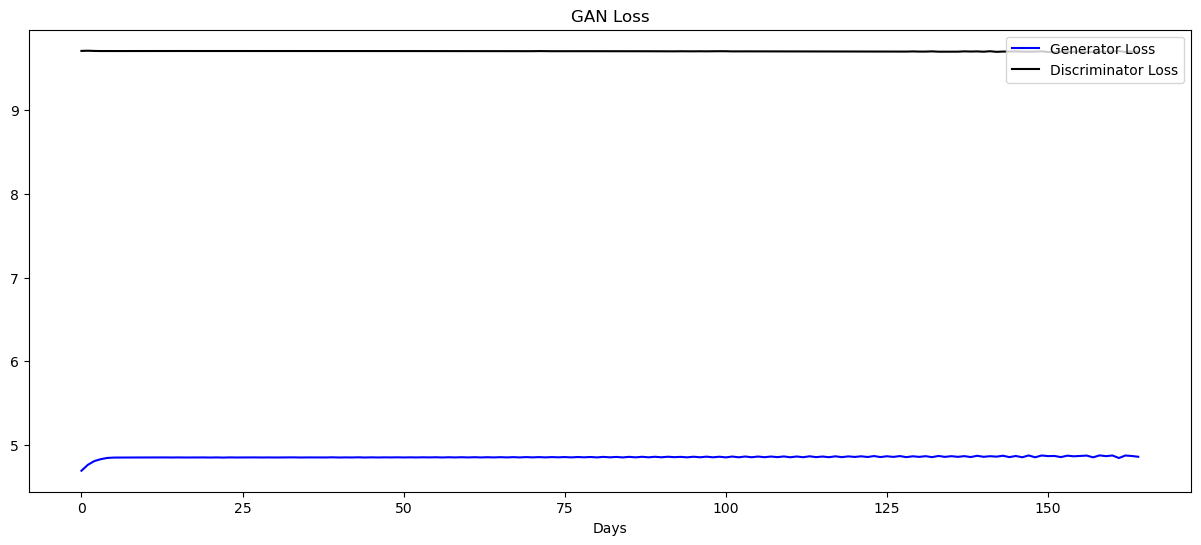

In [35]:
plt.figure(figsize = (15, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('GAN Loss')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [36]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

Training dataset RMSE:14.910856068943431


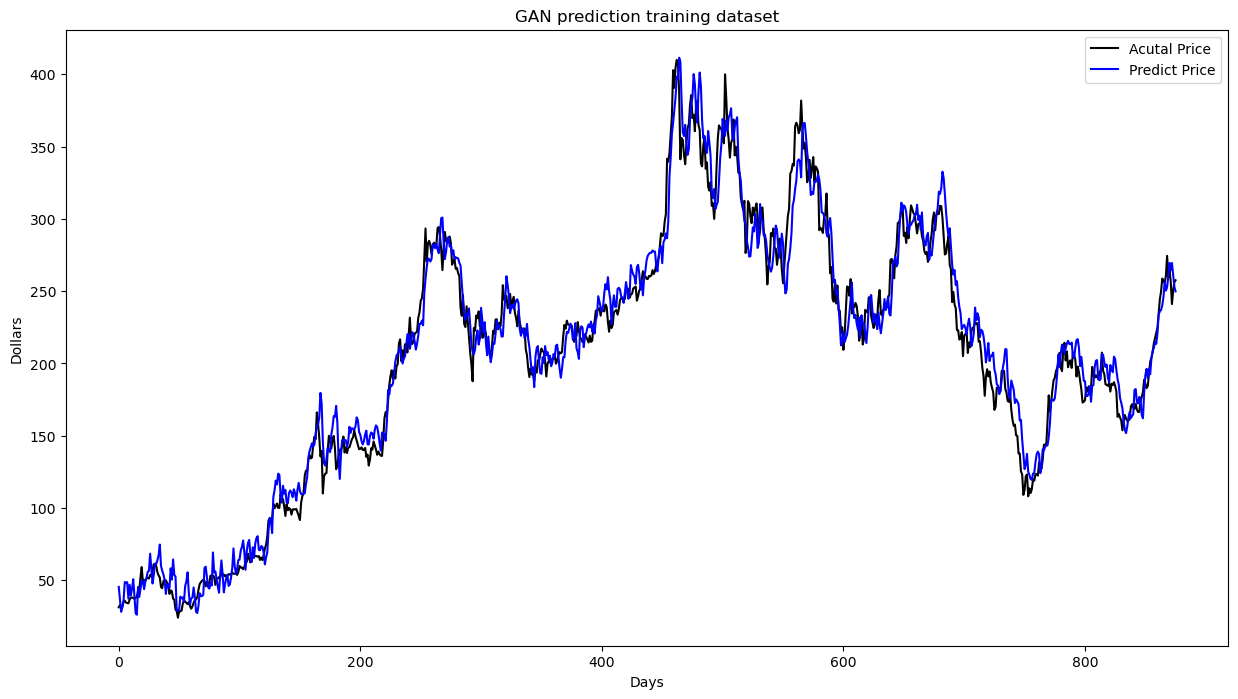

In [37]:
plt.figure(figsize=(15, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction training dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

Training dataset RMSE:13.762615705096849


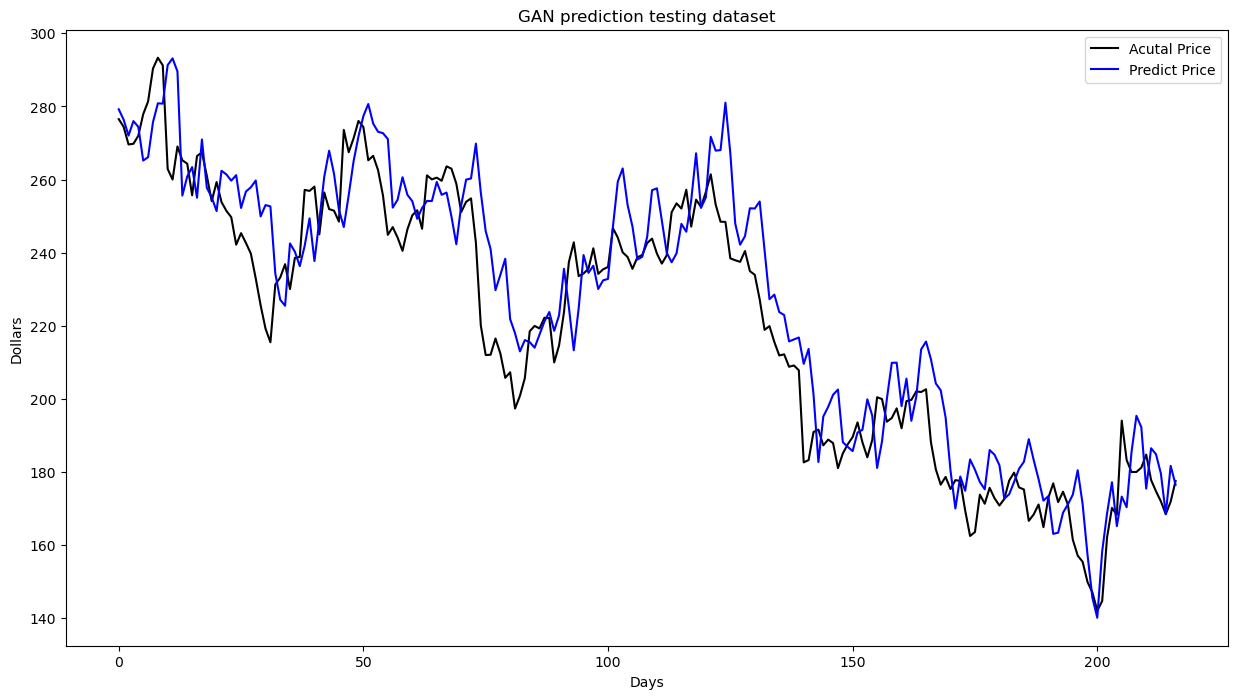

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction testing dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

# NETFLIX

In [39]:
ticker_symbol = 'NFLX'

data = yf.download(ticker_symbol, start="2020-01-01", end=dt.date.today())

print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02  326.100006  329.980011  324.779999  329.809998  329.809998   
2020-01-03  326.779999  329.859985  325.529999  325.899994  325.899994   
2020-01-06  323.119995  336.359985  321.200012  335.829987  335.829987   
2020-01-07  336.470001  336.700012  330.299988  330.750000  330.750000   
2020-01-08  331.489990  342.700012  331.049988  339.260010  339.260010   
...                ...         ...         ...         ...         ...   
2024-05-08  601.630005  618.219971  601.630005  609.469971  609.469971   
2024-05-09  614.400024  615.719971  605.750000  612.090027  612.090027   
2024-05-10  619.000000  623.979980  605.059998  610.869995  610.869995   
2024-05-13  614.299988  618.219971  606.830017  616.590027  616.590027   
2024-05-14  615.169983  621.479980  608.400024  613.659973  613.659973   

             Volume  
Date           

In [40]:
data['y'] = data['Close'].copy()

x = data.iloc[:, :6].values
y = data.iloc[:, 6].values


split = int(data.shape[0]* 0.8)
train_x, test_x = x[: split, :], x[split:, :]
train_y, test_y = y[: split, ], y[split: , ]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))

trainX: (879, 6) trainY: (879,)
testX: (220, 6) testY: (220,)


In [41]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )
        
        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )       
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        ) 

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [42]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
model = VAE([6, 100, 100, 100, 10], 10)

In [43]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

In [44]:
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)

In [45]:
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')

train_x: torch.Size([876, 3, 16]) train_y: torch.Size([876, 1]) train_y_gan: torch.Size([876, 4, 1])
test_x: torch.Size([217, 3, 16]) test_y: torch.Size([217, 1]) test_y_gan: torch.Size([217, 4, 1])


In [46]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 3, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 3, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

In [47]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

batch_size = 128
learning_rate = 0.00016
num_epochs = 165

trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

modelG = Generator(16).to(device)
modelD = Discriminator().to(device)

criterion = nn.BCELoss()
optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.0, 0.9))
optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.0, 0.9))

histG = np.zeros(num_epochs)
histD = np.zeros(num_epochs)
count = 0
for epoch in range(num_epochs):
    loss_G = []
    loss_D = []
    for (x, y) in trainDataloader:
        x = x.to(device)
        y = y.to(device)

        fake_data = modelG(x)
        fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

        dis_real_output = modelD(y)
        real_labels = torch.ones_like(dis_real_output).to(device)
        lossD_real = criterion(dis_real_output, real_labels)


        dis_fake_output = modelD(fake_data)
        fake_labels = torch.zeros_like(real_labels).to(device)
        lossD_fake = criterion(dis_fake_output, fake_labels)

        lossD = (lossD_real + lossD_fake)

        modelD.zero_grad()
        lossD.backward(retain_graph=True)
        optimizerD.step()
        loss_D.append(lossD.item())

        output_fake = modelD(fake_data)
        lossG = criterion(output_fake, real_labels)
        modelG.zero_grad()
        lossG.backward()
        optimizerG.step()
        loss_G.append(lossG.item()) 
    histG[epoch] = sum(loss_G) 
    histD[epoch] = sum(loss_D)    
    print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')

[1/165] LossD: 9.703503251075745 LossG:4.808321118354797
[2/165] LossD: 9.704338788986206 LossG:4.843350112438202
[3/165] LossD: 9.704104900360107 LossG:4.86044442653656
[4/165] LossD: 9.70413076877594 LossG:4.852606296539307
[5/165] LossD: 9.703760027885437 LossG:4.8521047830581665
[6/165] LossD: 9.703521490097046 LossG:4.854724287986755
[7/165] LossD: 9.703611135482788 LossG:4.852073669433594
[8/165] LossD: 9.70328962802887 LossG:4.853932857513428
[9/165] LossD: 9.703740954399109 LossG:4.852542817592621
[10/165] LossD: 9.704123616218567 LossG:4.851926267147064
[11/165] LossD: 9.704660773277283 LossG:4.851876735687256
[12/165] LossD: 9.704186081886292 LossG:4.852229654788971
[13/165] LossD: 9.704008221626282 LossG:4.8523558378219604
[14/165] LossD: 9.70404052734375 LossG:4.8520015478134155
[15/165] LossD: 9.704071521759033 LossG:4.852780103683472
[16/165] LossD: 9.704100608825684 LossG:4.852129638195038
[17/165] LossD: 9.704065322875977 LossG:4.85202020406723
[18/165] LossD: 9.7040572

[143/165] LossD: 9.700261116027832 LossG:4.8625794649124146
[144/165] LossD: 9.691312789916992 LossG:4.862948834896088
[145/165] LossD: 9.695475339889526 LossG:4.869190990924835
[146/165] LossD: 9.693755388259888 LossG:4.85845285654068
[147/165] LossD: 9.693901896476746 LossG:4.874029576778412
[148/165] LossD: 9.69458556175232 LossG:4.878649532794952
[149/165] LossD: 9.692669749259949 LossG:4.872755646705627
[150/165] LossD: 9.69271183013916 LossG:4.863600194454193
[151/165] LossD: 9.694648027420044 LossG:4.873965322971344
[152/165] LossD: 9.692631006240845 LossG:4.858527660369873
[153/165] LossD: 9.689292550086975 LossG:4.8845356702804565
[154/165] LossD: 9.693420052528381 LossG:4.8605780601501465
[155/165] LossD: 9.689266920089722 LossG:4.878087222576141
[156/165] LossD: 9.693590998649597 LossG:4.866871535778046
[157/165] LossD: 9.688744187355042 LossG:4.876401603221893
[158/165] LossD: 9.695452332496643 LossG:4.861878037452698
[159/165] LossD: 9.687825441360474 LossG:4.8807595968246

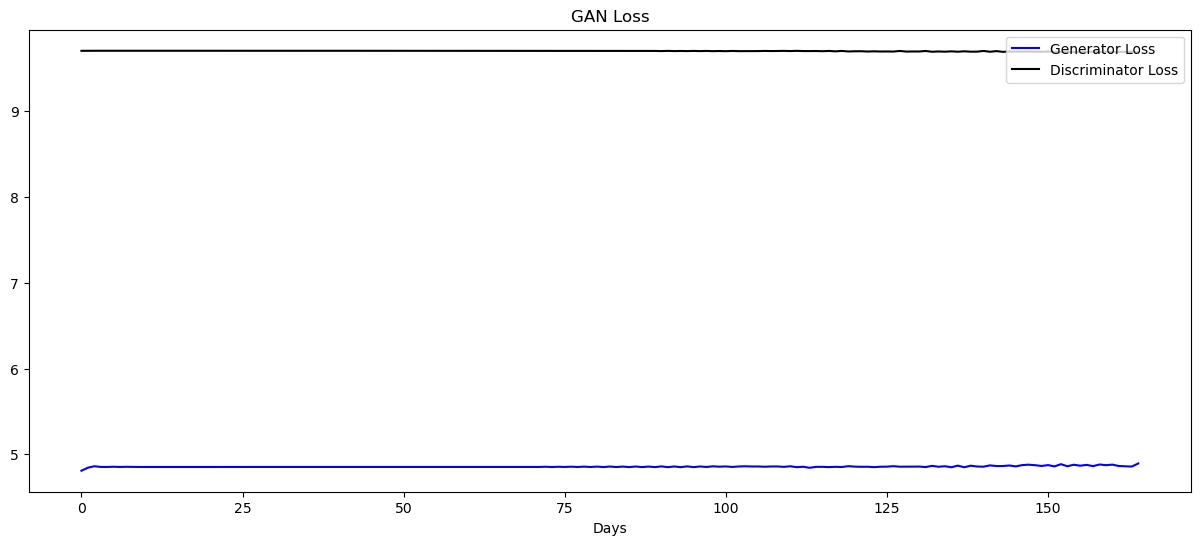

In [48]:
plt.figure(figsize = (15, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('GAN Loss')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [49]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

Training dataset RMSE:22.936871470517257


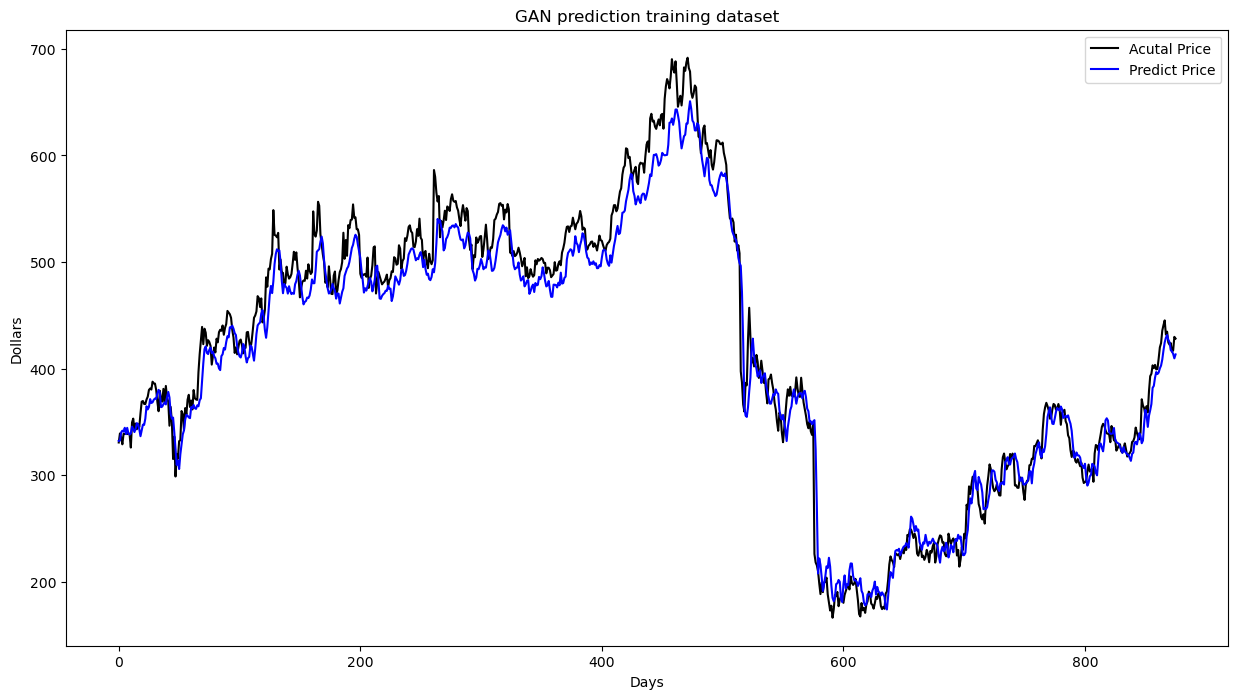

In [50]:
plt.figure(figsize=(15, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction training dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

Training dataset RMSE:24.980595398060682


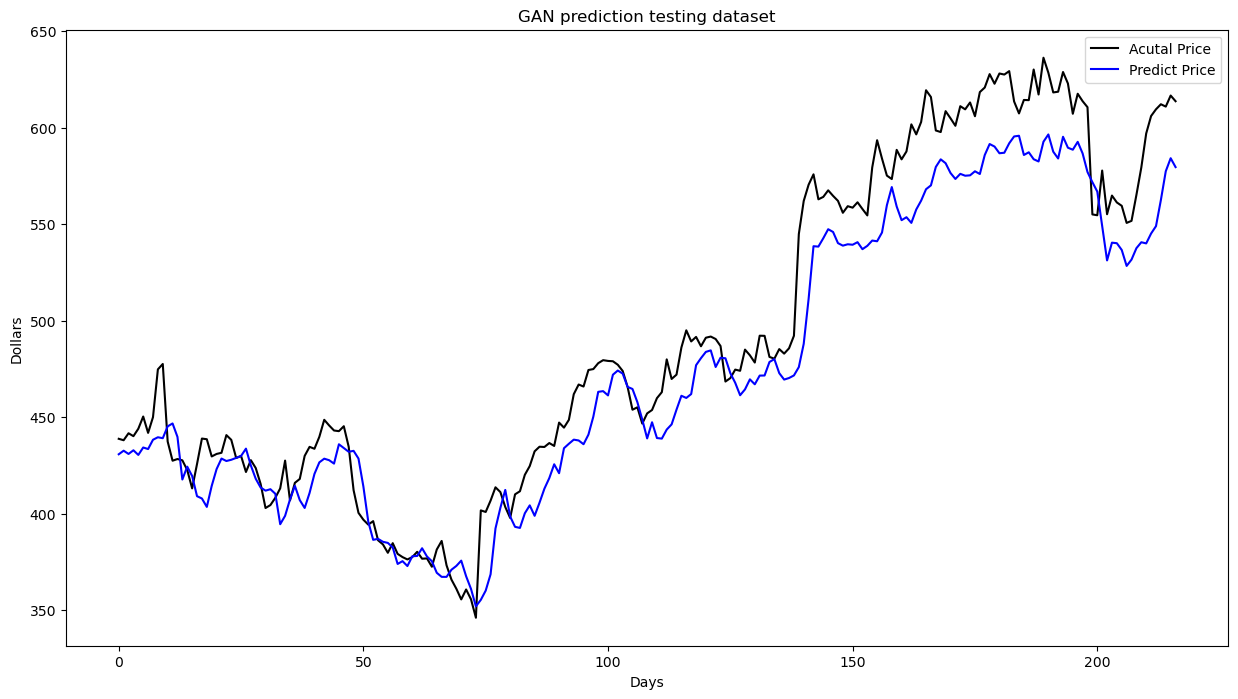

In [51]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction testing dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

# APPLE

In [55]:
ticker_symbol = 'AAPL'

data = yf.download(ticker_symbol, start="2020-01-01", end=dt.date.today())

print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-02   74.059998   75.150002   73.797501   75.087502   72.960487   
2020-01-03   74.287498   75.144997   74.125000   74.357498   72.251122   
2020-01-06   73.447502   74.989998   73.187500   74.949997   72.826859   
2020-01-07   74.959999   75.224998   74.370003   74.597504   72.484360   
2020-01-08   74.290001   76.110001   74.290001   75.797501   73.650360   
...                ...         ...         ...         ...         ...   
2024-05-08  182.850006  183.070007  181.449997  182.740005  182.492477   
2024-05-09  182.559998  184.660004  182.110001  184.570007  184.320007   
2024-05-10  184.899994  185.089996  182.130005  183.050003  183.050003   
2024-05-13  185.440002  187.100006  184.619995  186.279999  186.279999   
2024-05-14  187.509995  188.300003  186.289993  187.429993  187.429993   

               Volume  
Date         

In [56]:
data['y'] = data['Close'].copy()

x = data.iloc[:, :6].values
y = data.iloc[:, 6].values


split = int(data.shape[0]* 0.8)
train_x, test_x = x[: split, :], x[split:, :]
train_y, test_y = y[: split, ], y[split: , ]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))

trainX: (879, 6) trainY: (879,)
testX: (220, 6) testY: (220,)


In [57]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )
        
        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )       
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        ) 

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [58]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
model = VAE([6, 100, 100, 100, 10], 10)

In [59]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

In [60]:
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)

In [61]:
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')

train_x: torch.Size([876, 3, 16]) train_y: torch.Size([876, 1]) train_y_gan: torch.Size([876, 4, 1])
test_x: torch.Size([217, 3, 16]) test_y: torch.Size([217, 1]) test_y_gan: torch.Size([217, 4, 1])


In [62]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 3, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 3, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

In [63]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

batch_size = 128
learning_rate = 0.00016
num_epochs = 165

trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

modelG = Generator(16).to(device)
modelD = Discriminator().to(device)

criterion = nn.BCELoss()
optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.0, 0.9))
optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.0, 0.9))

histG = np.zeros(num_epochs)
histD = np.zeros(num_epochs)
count = 0
for epoch in range(num_epochs):
    loss_G = []
    loss_D = []
    for (x, y) in trainDataloader:
        x = x.to(device)
        y = y.to(device)

        fake_data = modelG(x)
        fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

        dis_real_output = modelD(y)
        real_labels = torch.ones_like(dis_real_output).to(device)
        lossD_real = criterion(dis_real_output, real_labels)


        dis_fake_output = modelD(fake_data)
        fake_labels = torch.zeros_like(real_labels).to(device)
        lossD_fake = criterion(dis_fake_output, fake_labels)

        lossD = (lossD_real + lossD_fake)

        modelD.zero_grad()
        lossD.backward(retain_graph=True)
        optimizerD.step()
        loss_D.append(lossD.item())

        output_fake = modelD(fake_data)
        lossG = criterion(output_fake, real_labels)
        modelG.zero_grad()
        lossG.backward()
        optimizerG.step()
        loss_G.append(lossG.item()) 
    histG[epoch] = sum(loss_G) 
    histD[epoch] = sum(loss_D)    
    print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')

[1/165] LossD: 9.701380729675293 LossG:4.895898222923279
[2/165] LossD: 9.70481550693512 LossG:4.8624056577682495
[3/165] LossD: 9.704509019851685 LossG:4.852858126163483
[4/165] LossD: 9.704124450683594 LossG:4.852989435195923
[5/165] LossD: 9.703992009162903 LossG:4.852468967437744
[6/165] LossD: 9.703889846801758 LossG:4.8522690534591675
[7/165] LossD: 9.703790068626404 LossG:4.85233473777771
[8/165] LossD: 9.703733086585999 LossG:4.8521688580513
[9/165] LossD: 9.703774690628052 LossG:4.8522093296051025
[10/165] LossD: 9.703798532485962 LossG:4.8522409200668335
[11/165] LossD: 9.703721046447754 LossG:4.853113114833832
[12/165] LossD: 9.703691005706787 LossG:4.851595640182495
[13/165] LossD: 9.703655123710632 LossG:4.853262305259705
[14/165] LossD: 9.703641176223755 LossG:4.852130472660065
[15/165] LossD: 9.703510999679565 LossG:4.852452456951141
[16/165] LossD: 9.703600287437439 LossG:4.852165400981903
[17/165] LossD: 9.703688502311707 LossG:4.852000117301941
[18/165] LossD: 9.70334

[142/165] LossD: 9.48792040348053 LossG:5.132017731666565
[143/165] LossD: 9.621616244316101 LossG:5.0295116901397705
[144/165] LossD: 9.380019903182983 LossG:5.182248771190643
[145/165] LossD: 9.43146276473999 LossG:5.145654022693634
[146/165] LossD: 9.466848254203796 LossG:5.164383769035339
[147/165] LossD: 9.564428448677063 LossG:4.9849496483802795
[148/165] LossD: 9.064385414123535 LossG:5.314900159835815
[149/165] LossD: 9.419957756996155 LossG:5.159098982810974
[150/165] LossD: 9.432381868362427 LossG:5.198209285736084
[151/165] LossD: 9.4924795627594 LossG:4.9663549065589905
[152/165] LossD: 9.335323810577393 LossG:5.36280620098114
[153/165] LossD: 9.339130759239197 LossG:5.246238708496094
[154/165] LossD: 9.358258247375488 LossG:5.298156678676605
[155/165] LossD: 9.285125374794006 LossG:5.243671894073486
[156/165] LossD: 9.52812933921814 LossG:5.156799554824829
[157/165] LossD: 9.480785012245178 LossG:5.163775563240051
[158/165] LossD: 9.451217412948608 LossG:5.122280836105347


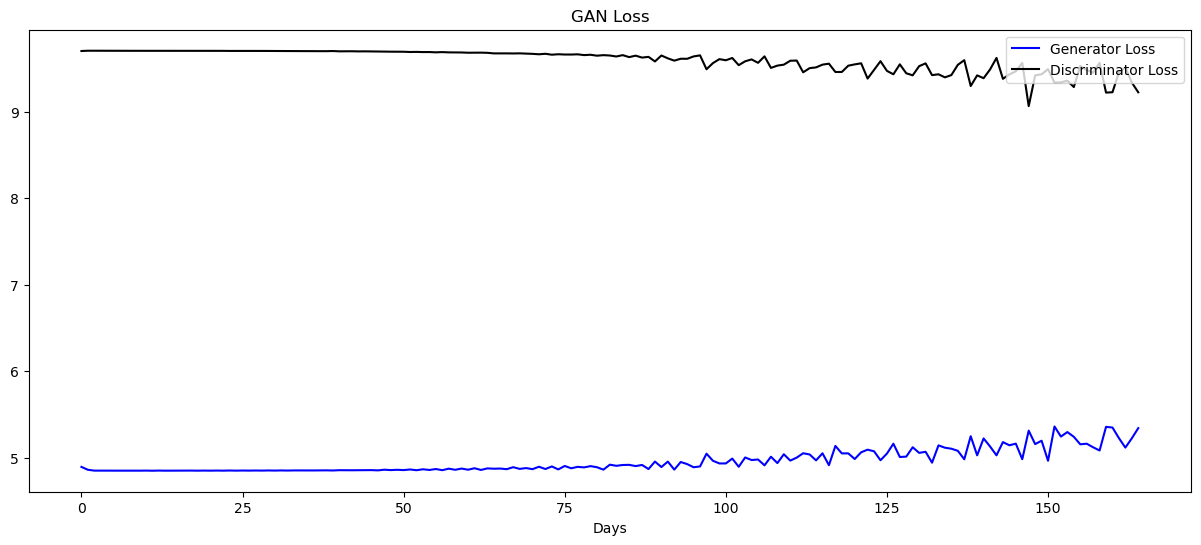

In [64]:
plt.figure(figsize = (15, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('GAN Loss')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [65]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

Training dataset RMSE:8.364309108558347


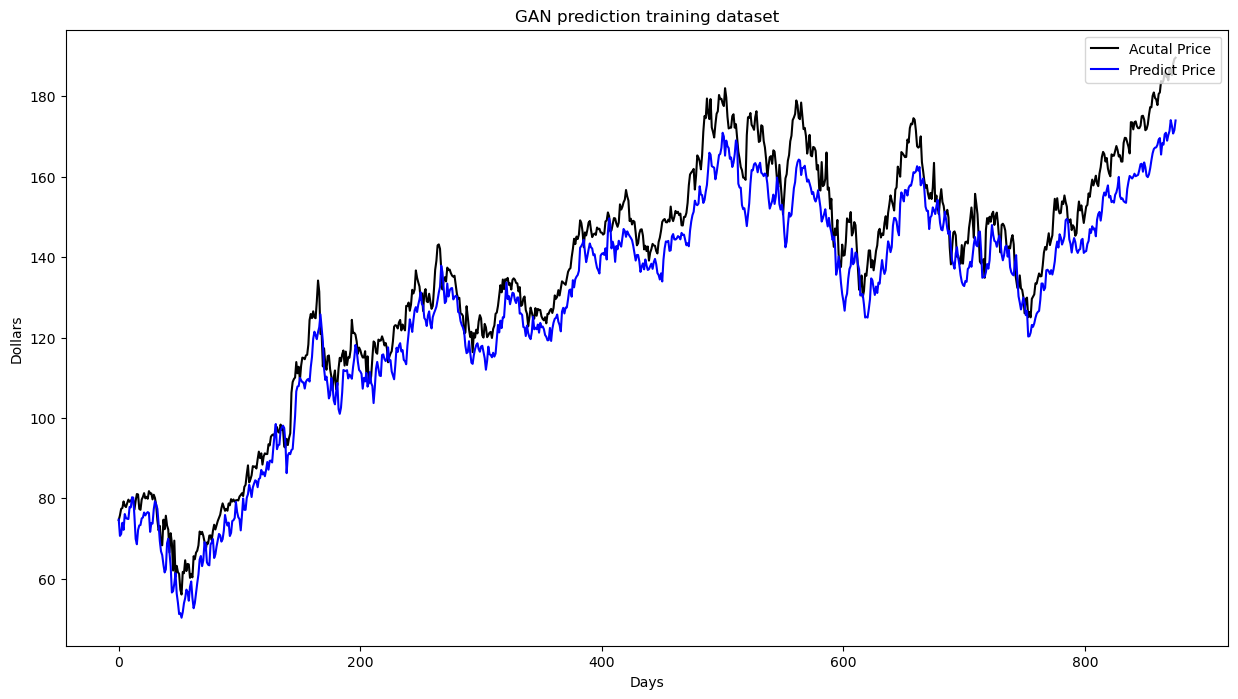

In [66]:
plt.figure(figsize=(15, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction training dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

Training dataset RMSE:13.600000746827172


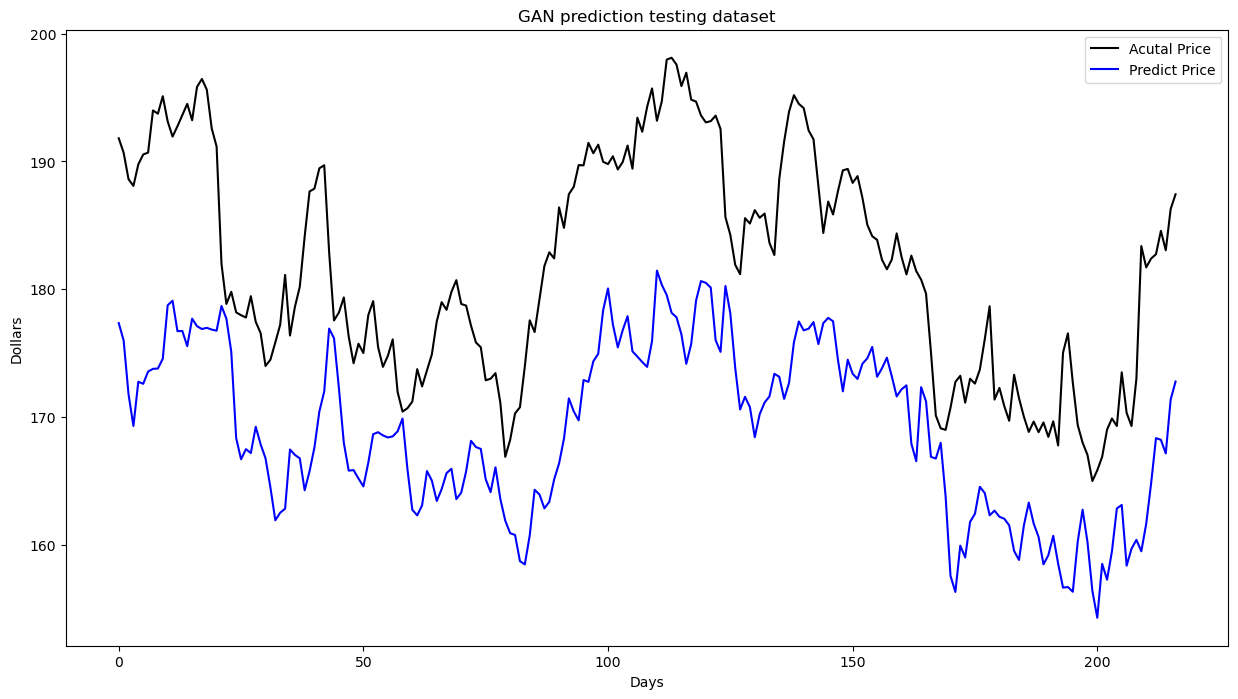

In [67]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction testing dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

# NIKE

In [68]:
ticker_symbol = 'NKE'

data = yf.download(ticker_symbol, start="2020-01-01", end=dt.date.today())

print(data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2020-01-02  101.360001  102.209999  101.019997  102.199997  97.793625   
2020-01-03  100.589996  102.000000  100.309998  101.919998  97.525696   
2020-01-06  100.949997  101.839996  100.870003  101.830002  97.439583   
2020-01-07  101.809998  102.739998  100.809998  101.779999  97.391716   
2020-01-08  101.309998  102.139999  100.849998  101.550003  97.171638   
...                ...         ...         ...         ...        ...   
2024-05-08   93.120003   93.639999   92.730003   93.589996  93.589996   
2024-05-09   93.639999   93.980003   93.010002   93.389999  93.389999   
2024-05-10   93.070000   93.139999   90.879997   90.940002  90.940002   
2024-05-13   91.269997   92.769997   91.150002   92.720001  92.720001   
2024-05-14   92.989998   94.339996   92.599998   92.790001  92.790001   

              Volume  
Date                  
2020

In [69]:
data['y'] = data['Close'].copy()

x = data.iloc[:, :6].values
y = data.iloc[:, 6].values


split = int(data.shape[0]* 0.8)
train_x, test_x = x[: split, :], x[split:, :]
train_y, test_y = y[: split, ], y[split: , ]

print(f'trainX: {train_x.shape} trainY: {train_y.shape}')
print(f'testX: {test_x.shape} testY: {test_y.shape}')

x_scaler = MinMaxScaler(feature_range = (0, 1))
y_scaler = MinMaxScaler(feature_range = (0, 1))

train_x = x_scaler.fit_transform(train_x)
test_x = x_scaler.transform(test_x)

train_y = y_scaler.fit_transform(train_y.reshape(-1, 1))
test_y = y_scaler.transform(test_y.reshape(-1, 1))

trainX: (879, 6) trainY: (879,)
testX: (220, 6) testY: (220,)


In [70]:
class VAE(nn.Module):
    def __init__(self, config, latent_dim):
        super().__init__()

        modules = []
        for i in range(1, len(config)):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i - 1], config[i]),
                    nn.ReLU()
                )
            )
        
        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(config[-1], latent_dim)
        self.fc_var = nn.Linear(config[-1], latent_dim)

        modules = []
        self.decoder_input = nn.Linear(latent_dim, config[-1])

        for i in range(len(config) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(config[i], config[i - 1]),
                    nn.ReLU()
                )
            )       
        modules.append(
            nn.Sequential(
                nn.Linear(config[1], config[0]),
                nn.Sigmoid()
            )
        ) 

        self.decoder = nn.Sequential(*modules)

    def encode(self, x):
        result = self.encoder(x)
        mu = self.fc_mu(result)
        logVar = self.fc_var(result)
        return mu, logVar

    def decode(self, x):
        result = self.decoder(x)
        return result

    def reparameterize(self, mu, logVar):
        std = torch.exp(0.5* logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        output = self.decode(z)
        return output, z, mu, logVar

In [71]:
train_loader = DataLoader(TensorDataset(torch.from_numpy(train_x).float()), batch_size = 128, shuffle = False)
model = VAE([6, 100, 100, 100, 10], 10)

In [72]:
def sliding_window(x, y, window):
    x_ = []
    y_ = []
    y_gan = []
    for i in range(window, x.shape[0]):
        tmp_x = x[i - window: i, :]
        tmp_y = y[i]
        tmp_y_gan = y[i - window: i + 1]
        x_.append(tmp_x)
        y_.append(tmp_y)
        y_gan.append(tmp_y_gan)
    x_ = torch.from_numpy(np.array(x_)).float()
    y_ = torch.from_numpy(np.array(y_)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()
    return x_, y_, y_gan

In [73]:
train_x = np.concatenate((train_x, VAE_train_x.cpu().detach().numpy()), axis = 1)
test_x = np.concatenate((test_x, VAE_test_x.cpu().detach().numpy()), axis = 1)

In [74]:
train_x_slide, train_y_slide, train_y_gan = sliding_window(train_x, train_y, 3)
test_x_slide, test_y_slide, test_y_gan = sliding_window(test_x, test_y, 3)
print(f'train_x: {train_x_slide.shape} train_y: {train_y_slide.shape} train_y_gan: {train_y_gan.shape}')
print(f'test_x: {test_x_slide.shape} test_y: {test_y_slide.shape} test_y_gan: {test_y_gan.shape}')

train_x: torch.Size([876, 3, 16]) train_y: torch.Size([876, 1]) train_y_gan: torch.Size([876, 4, 1])
test_x: torch.Size([217, 3, 16]) test_y: torch.Size([217, 1]) test_y_gan: torch.Size([217, 4, 1])


In [75]:
class Generator(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.gru_1 = nn.GRU(input_size, 1024, batch_first = True)
        self.gru_2 = nn.GRU(1024, 512, batch_first = True)
        self.gru_3 = nn.GRU(512, 256, batch_first = True)
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        use_cuda = 1
        device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(device)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)
        h1 = torch.zeros(1, x.size(0), 512).to(device)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)
        h2 = torch.zeros(1, x.size(0), 256).to(device)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)
        out_4 = self.linear_1(out_3[:, -1, :])
        out_5 = self.linear_2(out_4)
        out = self.linear_3(out_5)
        return out

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(4, 32, kernel_size = 3, stride = 1, padding = 'same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size = 3, stride = 1, padding = 'same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size = 3, stride = 1, padding = 'same')
        self.linear1 = nn.Linear(128, 220)
        self.batch1 = nn.BatchNorm1d(220)
        self.linear2 = nn.Linear(220, 220)
        self.batch2 = nn.BatchNorm1d(220)
        self.linear3 = nn.Linear(220, 1)
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)
        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)
        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)
        flatten_x = conv3.reshape(conv3.shape[0], conv3.shape[1])
        out_1 = self.linear1(flatten_x)
        out_1 = self.leaky(out_1)
        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)
        out_3 = self.linear3(out_2)
        out = self.sigmoid(out_3)
        return out

In [76]:
use_cuda = 1
device = torch.device("cuda" if (torch.cuda.is_available() & use_cuda) else "cpu")

batch_size = 128
learning_rate = 0.00016
num_epochs = 165

trainDataloader = DataLoader(TensorDataset(train_x_slide, train_y_gan), batch_size = batch_size, shuffle = False)

modelG = Generator(16).to(device)
modelD = Discriminator().to(device)

criterion = nn.BCELoss()
optimizerG = torch.optim.Adam(modelG.parameters(), lr = learning_rate, betas = (0.0, 0.9))
optimizerD = torch.optim.Adam(modelD.parameters(), lr = learning_rate, betas = (0.0, 0.9))

histG = np.zeros(num_epochs)
histD = np.zeros(num_epochs)
count = 0
for epoch in range(num_epochs):
    loss_G = []
    loss_D = []
    for (x, y) in trainDataloader:
        x = x.to(device)
        y = y.to(device)

        fake_data = modelG(x)
        fake_data = torch.cat([y[:, :3, :], fake_data.reshape(-1, 1, 1)], axis = 1)

        dis_real_output = modelD(y)
        real_labels = torch.ones_like(dis_real_output).to(device)
        lossD_real = criterion(dis_real_output, real_labels)


        dis_fake_output = modelD(fake_data)
        fake_labels = torch.zeros_like(real_labels).to(device)
        lossD_fake = criterion(dis_fake_output, fake_labels)

        lossD = (lossD_real + lossD_fake)

        modelD.zero_grad()
        lossD.backward(retain_graph=True)
        optimizerD.step()
        loss_D.append(lossD.item())

        output_fake = modelD(fake_data)
        lossG = criterion(output_fake, real_labels)
        modelG.zero_grad()
        lossG.backward()
        optimizerG.step()
        loss_G.append(lossG.item()) 
    histG[epoch] = sum(loss_G) 
    histD[epoch] = sum(loss_D)    
    print(f'[{epoch+1}/{num_epochs}] LossD: {sum(loss_D)} LossG:{sum(loss_G)}')

[1/165] LossD: 9.708011031150818 LossG:4.685730993747711
[2/165] LossD: 9.705860257148743 LossG:4.758412599563599
[3/165] LossD: 9.70413339138031 LossG:4.8181710839271545
[4/165] LossD: 9.704070925712585 LossG:4.836214482784271
[5/165] LossD: 9.70406424999237 LossG:4.847516775131226
[6/165] LossD: 9.70380437374115 LossG:4.854783594608307
[7/165] LossD: 9.703809261322021 LossG:4.850651741027832
[8/165] LossD: 9.703676700592041 LossG:4.855857193470001
[9/165] LossD: 9.703931212425232 LossG:4.849880278110504
[10/165] LossD: 9.704033255577087 LossG:4.854865074157715
[11/165] LossD: 9.7039293050766 LossG:4.851677477359772
[12/165] LossD: 9.704052209854126 LossG:4.852204084396362
[13/165] LossD: 9.704032182693481 LossG:4.852259337902069
[14/165] LossD: 9.70405662059784 LossG:4.852127730846405
[15/165] LossD: 9.70409095287323 LossG:4.852030694484711
[16/165] LossD: 9.704067826271057 LossG:4.852202117443085
[17/165] LossD: 9.703982830047607 LossG:4.852521896362305
[18/165] LossD: 9.70414781570

[143/165] LossD: 9.70137894153595 LossG:4.856093049049377
[144/165] LossD: 9.702086210250854 LossG:4.852274000644684
[145/165] LossD: 9.7025705575943 LossG:4.855969429016113
[146/165] LossD: 9.69863736629486 LossG:4.857533156871796
[147/165] LossD: 9.699724078178406 LossG:4.8583595752716064
[148/165] LossD: 9.700912952423096 LossG:4.857410788536072
[149/165] LossD: 9.6994149684906 LossG:4.855899333953857
[150/165] LossD: 9.699322700500488 LossG:4.8539934158325195
[151/165] LossD: 9.698222875595093 LossG:4.858640134334564
[152/165] LossD: 9.700350999832153 LossG:4.860010623931885
[153/165] LossD: 9.702090382575989 LossG:4.8523958921432495
[154/165] LossD: 9.696911931037903 LossG:4.859817743301392
[155/165] LossD: 9.697873950004578 LossG:4.859578907489777
[156/165] LossD: 9.696960806846619 LossG:4.862150251865387
[157/165] LossD: 9.697304487228394 LossG:4.858016788959503
[158/165] LossD: 9.701093673706055 LossG:4.852245807647705
[159/165] LossD: 9.700596570968628 LossG:4.864630579948425


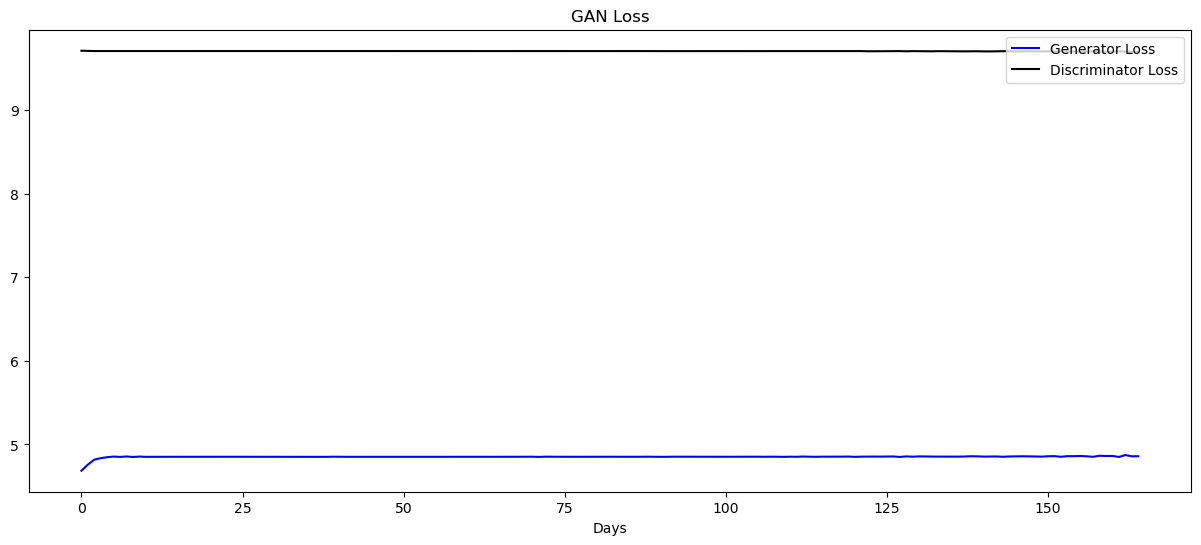

In [77]:
plt.figure(figsize = (15, 6))
plt.plot(histG, color = 'blue', label = 'Generator Loss')
plt.plot(histD, color = 'black', label = 'Discriminator Loss')
plt.title('GAN Loss')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

In [78]:
modelG.eval()
pred_y_train = modelG(train_x_slide.to(device))
pred_y_test = modelG(test_x_slide.to(device))

y_train_true = y_scaler.inverse_transform(train_y_slide)
y_train_pred = y_scaler.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_true = y_scaler.inverse_transform(test_y_slide)
y_test_pred = y_scaler.inverse_transform(pred_y_test.cpu().detach().numpy())

Training dataset RMSE:4.461499637927328


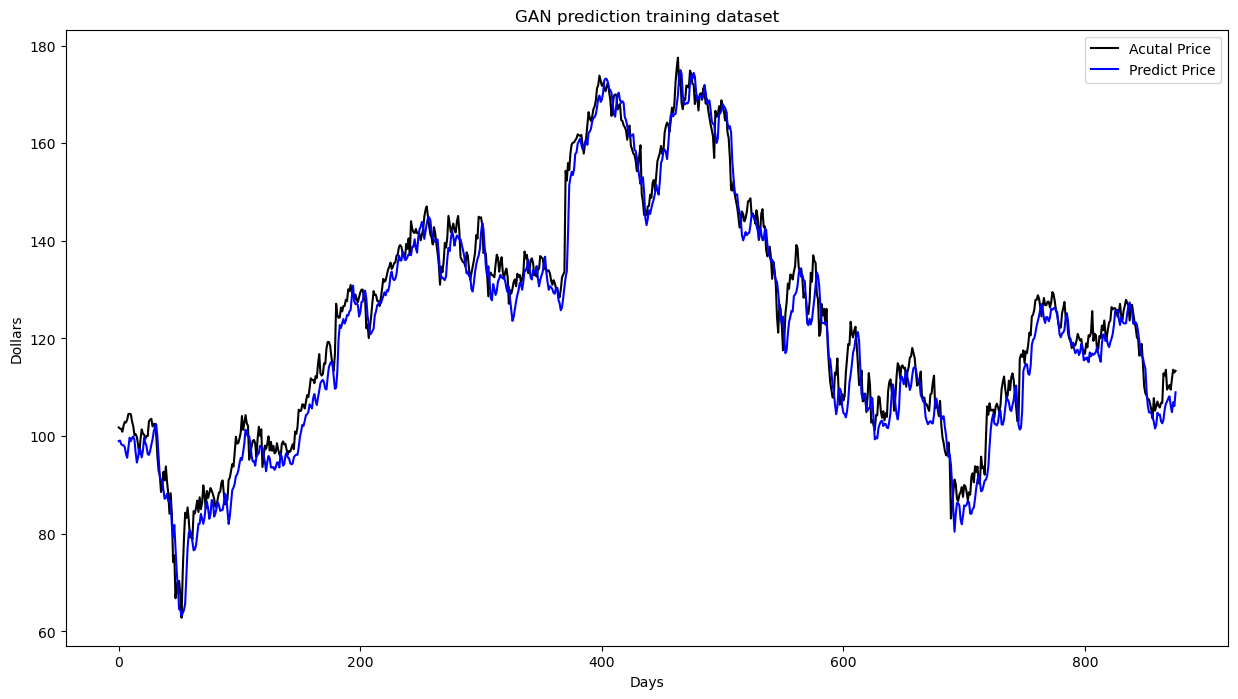

In [79]:
plt.figure(figsize=(15, 8))
plt.plot(y_train_true, color = 'black', label = 'Acutal Price')
plt.plot(y_train_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction training dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_train_true, y_train_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

Training dataset RMSE:3.6751548755721153


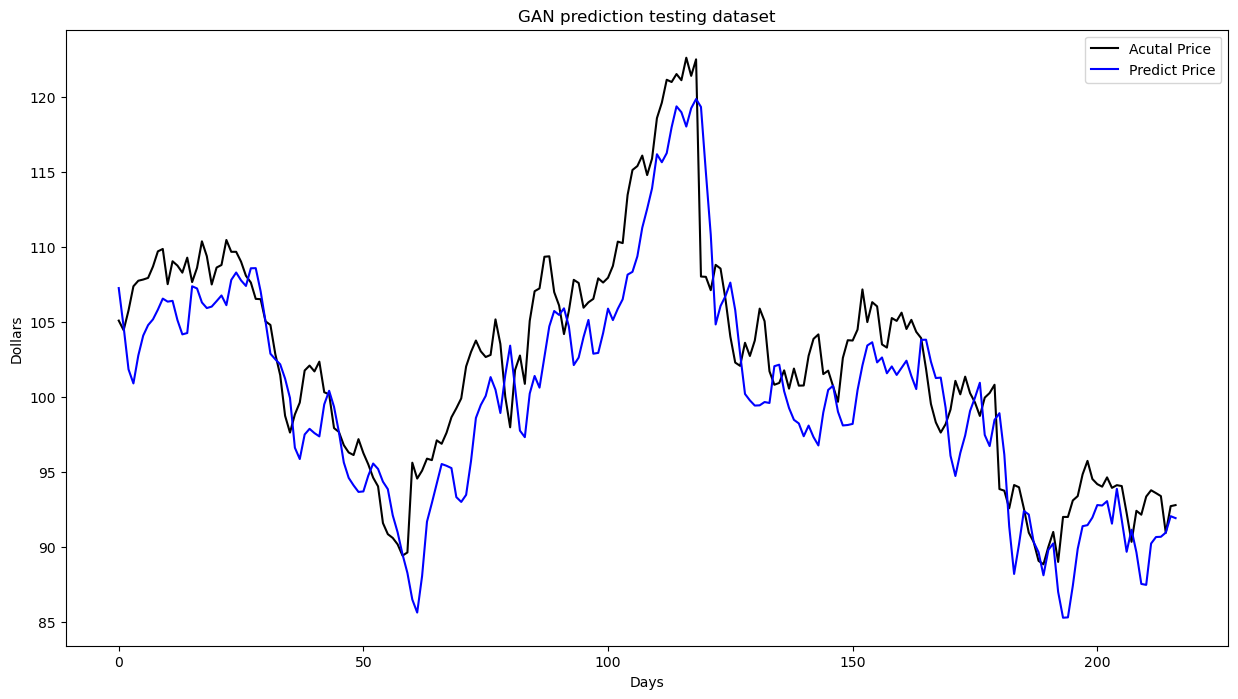

In [80]:
plt.figure(figsize=(15, 8))
plt.plot(y_test_true, color = 'black', label = 'Acutal Price')
plt.plot(y_test_pred, color = 'blue', label = 'Predict Price')
plt.title('GAN prediction testing dataset')
plt.ylabel('Dollars')
plt.xlabel('Days')
plt.legend(loc = 'upper right')

MSE = mean_squared_error(y_test_true, y_test_pred)
RMSE = math.sqrt(MSE)
print(f'Training dataset RMSE:{RMSE}')

# XGBoost

In [86]:
import pandas as pd
import yfinance as yf
from xgboost import XGBRegressor
import joblib

def Dataset(ticker, start, end, days_list):
    try:
        df = yf.download(ticker, start=start, end=end)
    except Exception as e:
        print(f"An error occurred while fetching data: {e}")
        return None, None
    
    if df.empty:
        print("No data returned.")
        return None, None
    
    df = df[['Adj Close']]
    df.columns = ['adjclose']
    
    features = ['adjclose']
    for day in days_list:
        df[f'adjclose_{day}d'] = df['adjclose'].shift(day)
        features.append(f'adjclose_{day}d')

    df = df.dropna()
    df['target'] = df['adjclose'].shift(-1)
    df = df.dropna()
    
    return df, features

def XGBoostTimeSeriesForecastingModel(df, features, label, perc, n_estimators, learning_rate):
    n = int(len(df) * (1 - perc))
    train = df[:n]
    test = df[n:]

    X_train, y_train = train[features], train[label]
    X_test, y_test = test[features], test[label]

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

    joblib.dump(model, 'XGBoostTimeSeriesForecastingModel.pkl')
    
    return None

def predict_prices(ticker, start_date, end_date, days_list):
    df, features = Dataset(ticker=ticker, start=start_date, end=end_date, days_list=days_list)
    
    if df is not None and features is not None:
        XGBoostTimeSeriesForecastingModel(df, features, label='target', perc=0.2, n_estimators=560, learning_rate=0.1)
        
        model = joblib.load('XGBoostTimeSeriesForecastingModel.pkl')
        
        X = df[features]
        df['predicted_price'] = model.predict(X)
        
        return df[['target', 'predicted_price']]
    else:
        return None

result = predict_prices(ticker='TSLA', start_date='2023-01-01', end_date='2024-05-14', days_list=[1, 2, 3, 5, 10])
if result is not None:
    print(result)


[*********************100%%**********************]  1 of 1 completed

[0]	validation_0-rmse:32.59357	validation_1-rmse:41.60634
[1]	validation_0-rmse:29.61526	validation_1-rmse:37.80762
[2]	validation_0-rmse:26.93890	validation_1-rmse:34.53562
[3]	validation_0-rmse:24.52767	validation_1-rmse:31.47466
[4]	validation_0-rmse:22.36186	validation_1-rmse:28.79798
[5]	validation_0-rmse:20.40166	validation_1-rmse:26.33577
[6]	validation_0-rmse:18.63778	validation_1-rmse:24.10525
[7]	validation_0-rmse:17.04952	validation_1-rmse:22.11790
[8]	validation_0-rmse:15.61608	validation_1-rmse:20.26597
[9]	validation_0-rmse:14.32544	validation_1-rmse:18.51252
[10]	validation_0-rmse:13.15900	validation_1-rmse:17.01901
[11]	validation_0-rmse:12.11103	validation_1-rmse:15.76481
[12]	validation_0-rmse:11.16955	validation_1-rmse:14.69570
[13]	validation_0-rmse:10.31165	validation_1-rmse:13.65661
[14]	validation_0-rmse:9.54120	validation_1-rmse:12.83309
[15]	validation_0-rmse:8.85495	validation_1-rmse:12.12092
[16]	validation_0-rmse:8.22650	validation_1-rmse:11.47413
[17]	valid


/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/1274549237.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/1274549237.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/1274549237.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

[124]	validation_0-rmse:0.65442	validation_1-rmse:7.90847
[125]	validation_0-rmse:0.65196	validation_1-rmse:7.91530
[126]	validation_0-rmse:0.64666	validation_1-rmse:7.91541
[127]	validation_0-rmse:0.63625	validation_1-rmse:7.91539
[128]	validation_0-rmse:0.62351	validation_1-rmse:7.91104
[129]	validation_0-rmse:0.61334	validation_1-rmse:7.91104
[130]	validation_0-rmse:0.60488	validation_1-rmse:7.90813
[131]	validation_0-rmse:0.59370	validation_1-rmse:7.90778
[132]	validation_0-rmse:0.58927	validation_1-rmse:7.90786
[133]	validation_0-rmse:0.57771	validation_1-rmse:7.91322
[134]	validation_0-rmse:0.57596	validation_1-rmse:7.91503
[135]	validation_0-rmse:0.56648	validation_1-rmse:7.91506
[136]	validation_0-rmse:0.56007	validation_1-rmse:7.92099
[137]	validation_0-rmse:0.55019	validation_1-rmse:7.92116
[138]	validation_0-rmse:0.54395	validation_1-rmse:7.92101
[139]	validation_0-rmse:0.54028	validation_1-rmse:7.92120
[140]	validation_0-rmse:0.53915	validation_1-rmse:7.92311
[141]	validati

[266]	validation_0-rmse:0.10690	validation_1-rmse:7.95816
[267]	validation_0-rmse:0.10523	validation_1-rmse:7.95880
[268]	validation_0-rmse:0.10254	validation_1-rmse:7.95885
[269]	validation_0-rmse:0.10124	validation_1-rmse:7.95883
[270]	validation_0-rmse:0.10095	validation_1-rmse:7.95927
[271]	validation_0-rmse:0.09929	validation_1-rmse:7.95915
[272]	validation_0-rmse:0.09910	validation_1-rmse:7.95917
[273]	validation_0-rmse:0.09877	validation_1-rmse:7.95914
[274]	validation_0-rmse:0.09644	validation_1-rmse:7.95902
[275]	validation_0-rmse:0.09614	validation_1-rmse:7.95952
[276]	validation_0-rmse:0.09529	validation_1-rmse:7.95954
[277]	validation_0-rmse:0.09300	validation_1-rmse:7.95950
[278]	validation_0-rmse:0.09096	validation_1-rmse:7.95952
[279]	validation_0-rmse:0.08915	validation_1-rmse:7.95989
[280]	validation_0-rmse:0.08880	validation_1-rmse:7.96055
[281]	validation_0-rmse:0.08852	validation_1-rmse:7.96047
[282]	validation_0-rmse:0.08753	validation_1-rmse:7.96047
[283]	validati

[408]	validation_0-rmse:0.01734	validation_1-rmse:7.96766
[409]	validation_0-rmse:0.01709	validation_1-rmse:7.96765
[410]	validation_0-rmse:0.01673	validation_1-rmse:7.96774
[411]	validation_0-rmse:0.01636	validation_1-rmse:7.96761
[412]	validation_0-rmse:0.01626	validation_1-rmse:7.96760
[413]	validation_0-rmse:0.01620	validation_1-rmse:7.96777
[414]	validation_0-rmse:0.01583	validation_1-rmse:7.96777
[415]	validation_0-rmse:0.01570	validation_1-rmse:7.96777
[416]	validation_0-rmse:0.01550	validation_1-rmse:7.96806
[417]	validation_0-rmse:0.01526	validation_1-rmse:7.96808
[418]	validation_0-rmse:0.01518	validation_1-rmse:7.96807
[419]	validation_0-rmse:0.01491	validation_1-rmse:7.96807
[420]	validation_0-rmse:0.01468	validation_1-rmse:7.96809
[421]	validation_0-rmse:0.01460	validation_1-rmse:7.96808
[422]	validation_0-rmse:0.01445	validation_1-rmse:7.96826
[423]	validation_0-rmse:0.01422	validation_1-rmse:7.96825
[424]	validation_0-rmse:0.01410	validation_1-rmse:7.96844
[425]	validati

[550]	validation_0-rmse:0.00281	validation_1-rmse:7.97026
[551]	validation_0-rmse:0.00276	validation_1-rmse:7.97026
[552]	validation_0-rmse:0.00272	validation_1-rmse:7.97024
[553]	validation_0-rmse:0.00271	validation_1-rmse:7.97025
[554]	validation_0-rmse:0.00269	validation_1-rmse:7.97025
[555]	validation_0-rmse:0.00263	validation_1-rmse:7.97026
[556]	validation_0-rmse:0.00261	validation_1-rmse:7.97026
[557]	validation_0-rmse:0.00261	validation_1-rmse:7.97026
[558]	validation_0-rmse:0.00260	validation_1-rmse:7.97026
[559]	validation_0-rmse:0.00258	validation_1-rmse:7.97027
                target  predicted_price
Date                                   
2023-01-18  127.169998       127.172394
2023-01-19  133.419998       133.419678
2023-01-20  143.750000       143.749939
2023-01-23  143.889999       143.889801
2023-01-24  144.429993       144.430466
...                ...              ...
2024-05-06  177.809998       188.859467
2024-05-07  174.720001       180.277435
2024-05-08  171.9700

In [87]:
import pandas as pd
import yfinance as yf
from xgboost import XGBRegressor
import joblib

def Dataset(ticker, start, end, days_list):
    try:
        df = yf.download(ticker, start=start, end=end)
    except Exception as e:
        print(f"An error occurred while fetching data: {e}")
        return None, None
    
    if df.empty:
        print("No data returned.")
        return None, None
    
    df = df[['Adj Close']]
    df.columns = ['adjclose']
    
    features = ['adjclose']
    for day in days_list:
        df[f'adjclose_{day}d'] = df['adjclose'].shift(day)
        features.append(f'adjclose_{day}d')

    df = df.dropna()
    df['target'] = df['adjclose'].shift(-1)
    df = df.dropna()
    
    return df, features

def XGBoostTimeSeriesForecastingModel(df, features, label, perc, n_estimators, learning_rate):
    n = int(len(df) * (1 - perc))
    train = df[:n]
    test = df[n:]

    X_train, y_train = train[features], train[label]
    X_test, y_test = test[features], test[label]

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

    joblib.dump(model, 'XGBoostTimeSeriesForecastingModel.pkl')
    
    return None

def predict_prices(ticker, start_date, end_date, days_list):
    df, features = Dataset(ticker=ticker, start=start_date, end=end_date, days_list=days_list)
    
    if df is not None and features is not None:
        XGBoostTimeSeriesForecastingModel(df, features, label='target', perc=0.2, n_estimators=560, learning_rate=0.1)
        
        model = joblib.load('XGBoostTimeSeriesForecastingModel.pkl')
        
        X = df[features]
        df['predicted_price'] = model.predict(X)
        
        next_day_features = features.copy()
        next_day = df.iloc[[-1]][next_day_features]
        predicted_next_day_price = model.predict(next_day)[0]
        
        return predicted_next_day_price
    else:
        return None

predicted_price = predict_prices(ticker='TSLA', start_date='2020-01-01', end_date='2024-05-14', days_list=[1, 2, 3, 5, 10])
if predicted_price is not None:
    print("Predicted price for MAY 15, 2024:", predicted_price)


[*********************100%%**********************]  1 of 1 completed

[0]	validation_0-rmse:79.94597	validation_1-rmse:35.95277
[1]	validation_0-rmse:72.21407	validation_1-rmse:32.50403
[2]	validation_0-rmse:65.25048	validation_1-rmse:29.41599
[3]	validation_0-rmse:58.98187	validation_1-rmse:26.65135
[4]	validation_0-rmse:53.34414	validation_1-rmse:24.22327
[5]	validation_0-rmse:48.27197	validation_1-rmse:22.09812
[6]	validation_0-rmse:43.70534	validation_1-rmse:20.06025
[7]	validation_0-rmse:39.59807	validation_1-rmse:18.25271
[8]	validation_0-rmse:35.90327	validation_1-rmse:16.72893
[9]	validation_0-rmse:32.58149	validation_1-rmse:15.37987
[10]	validation_0-rmse:29.60085	validation_1-rmse:14.14853
[11]	validation_0-rmse:26.92009	validation_1-rmse:13.06335
[12]	validation_0-rmse:24.51788	validation_1-rmse:12.14950
[13]	validation_0-rmse:22.37068	validation_1-rmse:11.40239
[14]	validation_0-rmse:20.44122	validation_1-rmse:10.71198
[15]	validation_0-rmse:18.70858	validation_1-rmse:10.16559
[16]	validation_0-rmse:17.15754	validation_1-rmse:9.66843
[17]	val


/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/838586385.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/838586385.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/838586385.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

[121]	validation_0-rmse:2.67659	validation_1-rmse:8.07101
[122]	validation_0-rmse:2.66445	validation_1-rmse:8.07731
[123]	validation_0-rmse:2.64242	validation_1-rmse:8.07936
[124]	validation_0-rmse:2.62817	validation_1-rmse:8.08004
[125]	validation_0-rmse:2.61470	validation_1-rmse:8.08337
[126]	validation_0-rmse:2.60110	validation_1-rmse:8.08320
[127]	validation_0-rmse:2.58775	validation_1-rmse:8.08266
[128]	validation_0-rmse:2.57007	validation_1-rmse:8.08347
[129]	validation_0-rmse:2.53665	validation_1-rmse:8.09239
[130]	validation_0-rmse:2.52454	validation_1-rmse:8.09224
[131]	validation_0-rmse:2.50714	validation_1-rmse:8.10300
[132]	validation_0-rmse:2.47997	validation_1-rmse:8.11197
[133]	validation_0-rmse:2.46862	validation_1-rmse:8.11263
[134]	validation_0-rmse:2.44374	validation_1-rmse:8.12457
[135]	validation_0-rmse:2.42896	validation_1-rmse:8.12341
[136]	validation_0-rmse:2.42675	validation_1-rmse:8.12329
[137]	validation_0-rmse:2.41725	validation_1-rmse:8.12798
[138]	validati

[263]	validation_0-rmse:1.17319	validation_1-rmse:8.37509
[264]	validation_0-rmse:1.15939	validation_1-rmse:8.38154
[265]	validation_0-rmse:1.15024	validation_1-rmse:8.38449
[266]	validation_0-rmse:1.13903	validation_1-rmse:8.38889
[267]	validation_0-rmse:1.13295	validation_1-rmse:8.38997
[268]	validation_0-rmse:1.12660	validation_1-rmse:8.38881
[269]	validation_0-rmse:1.11608	validation_1-rmse:8.38847
[270]	validation_0-rmse:1.11171	validation_1-rmse:8.38959
[271]	validation_0-rmse:1.10217	validation_1-rmse:8.38861
[272]	validation_0-rmse:1.09835	validation_1-rmse:8.39096
[273]	validation_0-rmse:1.09123	validation_1-rmse:8.39287
[274]	validation_0-rmse:1.08422	validation_1-rmse:8.39372
[275]	validation_0-rmse:1.07848	validation_1-rmse:8.39645
[276]	validation_0-rmse:1.07207	validation_1-rmse:8.39749
[277]	validation_0-rmse:1.06922	validation_1-rmse:8.39742
[278]	validation_0-rmse:1.06133	validation_1-rmse:8.39750
[279]	validation_0-rmse:1.05283	validation_1-rmse:8.39758
[280]	validati

[405]	validation_0-rmse:0.58119	validation_1-rmse:8.47151
[406]	validation_0-rmse:0.58008	validation_1-rmse:8.47150
[407]	validation_0-rmse:0.57989	validation_1-rmse:8.47148
[408]	validation_0-rmse:0.57712	validation_1-rmse:8.47168
[409]	validation_0-rmse:0.57408	validation_1-rmse:8.47140
[410]	validation_0-rmse:0.57367	validation_1-rmse:8.47139
[411]	validation_0-rmse:0.57060	validation_1-rmse:8.47433
[412]	validation_0-rmse:0.56947	validation_1-rmse:8.47496
[413]	validation_0-rmse:0.56535	validation_1-rmse:8.47594
[414]	validation_0-rmse:0.56028	validation_1-rmse:8.47966
[415]	validation_0-rmse:0.55665	validation_1-rmse:8.47874
[416]	validation_0-rmse:0.55401	validation_1-rmse:8.47876
[417]	validation_0-rmse:0.55148	validation_1-rmse:8.47727
[418]	validation_0-rmse:0.54683	validation_1-rmse:8.47892
[419]	validation_0-rmse:0.54074	validation_1-rmse:8.48063
[420]	validation_0-rmse:0.53583	validation_1-rmse:8.48104
[421]	validation_0-rmse:0.53348	validation_1-rmse:8.48258
[422]	validati

[547]	validation_0-rmse:0.27591	validation_1-rmse:8.50999
[548]	validation_0-rmse:0.27533	validation_1-rmse:8.51000
[549]	validation_0-rmse:0.27452	validation_1-rmse:8.51001
[550]	validation_0-rmse:0.27411	validation_1-rmse:8.51001
[551]	validation_0-rmse:0.27204	validation_1-rmse:8.50997
[552]	validation_0-rmse:0.27034	validation_1-rmse:8.51031
[553]	validation_0-rmse:0.26923	validation_1-rmse:8.51076
[554]	validation_0-rmse:0.26747	validation_1-rmse:8.50975
[555]	validation_0-rmse:0.26611	validation_1-rmse:8.50863
[556]	validation_0-rmse:0.26464	validation_1-rmse:8.50861
[557]	validation_0-rmse:0.26304	validation_1-rmse:8.50914
[558]	validation_0-rmse:0.26118	validation_1-rmse:8.50986
[559]	validation_0-rmse:0.26101	validation_1-rmse:8.50986
Predicted price for MAY 15, 2024: 165.83182


In [88]:
import pandas as pd
import yfinance as yf
from xgboost import XGBRegressor
import joblib

def Dataset(ticker, start, end, days_list):
    try:
        df = yf.download(ticker, start=start, end=end)
    except Exception as e:
        print(f"An error occurred while fetching data: {e}")
        return None, None
    
    if df.empty:
        print("No data returned.")
        return None, None
    
    df = df[['Adj Close']]
    df.columns = ['adjclose']
    
    features = ['adjclose']
    for day in days_list:
        df[f'adjclose_{day}d'] = df['adjclose'].shift(day)
        features.append(f'adjclose_{day}d')

    df = df.dropna()
    df['target'] = df['adjclose'].shift(-1)
    df = df.dropna()
    
    return df, features

def XGBoostTimeSeriesForecastingModel(df, features, label, perc, n_estimators, learning_rate):
    n = int(len(df) * (1 - perc))
    train = df[:n]
    test = df[n:]

    X_train, y_train = train[features], train[label]
    X_test, y_test = test[features], test[label]

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

    joblib.dump(model, 'XGBoostTimeSeriesForecastingModel.pkl')
    
    return None

def predict_prices(ticker, start_date, end_date, days_list):
    df, features = Dataset(ticker=ticker, start=start_date, end=end_date, days_list=days_list)
    
    if df is not None and features is not None:
        XGBoostTimeSeriesForecastingModel(df, features, label='target', perc=0.2, n_estimators=560, learning_rate=0.1)
        
        model = joblib.load('XGBoostTimeSeriesForecastingModel.pkl')
        
        X = df[features]
        df['predicted_price'] = model.predict(X)
        
        next_day_features = features.copy()
        next_day = df.iloc[[-1]][next_day_features]
        predicted_next_day_price = model.predict(next_day)[0]
        
        return predicted_next_day_price
    else:
        return None

predicted_price = predict_prices(ticker='AAPL', start_date='2020-01-01', end_date='2024-05-14', days_list=[1, 2, 3, 5, 10])
if predicted_price is not None:
    print("Predicted price for MAY 15, 2024:", predicted_price)


[*********************100%%**********************]  1 of 1 completed

[0]	validation_0-rmse:27.51747	validation_1-rmse:44.36745
[1]	validation_0-rmse:24.85849	validation_1-rmse:40.70005
[2]	validation_0-rmse:22.46091	validation_1-rmse:37.14013
[3]	validation_0-rmse:20.29792	validation_1-rmse:33.90150
[4]	validation_0-rmse:18.35132	validation_1-rmse:30.94000
[5]	validation_0-rmse:16.59905	validation_1-rmse:28.29627
[6]	validation_0-rmse:15.01997	validation_1-rmse:26.13331
[7]	validation_0-rmse:13.59893	validation_1-rmse:24.02911
[8]	validation_0-rmse:12.31927	validation_1-rmse:22.16274
[9]	validation_0-rmse:11.16773	validation_1-rmse:20.34866
[10]	validation_0-rmse:10.13200	validation_1-rmse:18.70546
[11]	validation_0-rmse:9.20007	validation_1-rmse:17.22279
[12]	validation_0-rmse:8.36441	validation_1-rmse:15.87026
[13]	validation_0-rmse:7.61370	validation_1-rmse:14.66222
[14]	validation_0-rmse:6.93824	validation_1-rmse:13.55403
[15]	validation_0-rmse:6.33443	validation_1-rmse:12.58943
[16]	validation_0-rmse:5.79108	validation_1-rmse:11.69110
[17]	validati


/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/1737922233.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/1737922233.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/1737922233.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

[112]	validation_0-rmse:1.01402	validation_1-rmse:3.54406
[113]	validation_0-rmse:1.00856	validation_1-rmse:3.54410
[114]	validation_0-rmse:1.00481	validation_1-rmse:3.54799
[115]	validation_0-rmse:0.99765	validation_1-rmse:3.54804
[116]	validation_0-rmse:0.99440	validation_1-rmse:3.54796
[117]	validation_0-rmse:0.98795	validation_1-rmse:3.54807
[118]	validation_0-rmse:0.98723	validation_1-rmse:3.54810
[119]	validation_0-rmse:0.97633	validation_1-rmse:3.54828
[120]	validation_0-rmse:0.97025	validation_1-rmse:3.54834
[121]	validation_0-rmse:0.96107	validation_1-rmse:3.54871
[122]	validation_0-rmse:0.95832	validation_1-rmse:3.55368
[123]	validation_0-rmse:0.94991	validation_1-rmse:3.55645
[124]	validation_0-rmse:0.94516	validation_1-rmse:3.55648
[125]	validation_0-rmse:0.93856	validation_1-rmse:3.55671
[126]	validation_0-rmse:0.93234	validation_1-rmse:3.55665
[127]	validation_0-rmse:0.92546	validation_1-rmse:3.55938
[128]	validation_0-rmse:0.92139	validation_1-rmse:3.56270
[129]	validati

[254]	validation_0-rmse:0.50259	validation_1-rmse:3.57261
[255]	validation_0-rmse:0.50208	validation_1-rmse:3.57263
[256]	validation_0-rmse:0.49862	validation_1-rmse:3.57263
[257]	validation_0-rmse:0.49522	validation_1-rmse:3.57262
[258]	validation_0-rmse:0.49344	validation_1-rmse:3.57261
[259]	validation_0-rmse:0.49324	validation_1-rmse:3.57144
[260]	validation_0-rmse:0.49207	validation_1-rmse:3.57145
[261]	validation_0-rmse:0.48962	validation_1-rmse:3.57144
[262]	validation_0-rmse:0.48804	validation_1-rmse:3.57144
[263]	validation_0-rmse:0.48665	validation_1-rmse:3.57141
[264]	validation_0-rmse:0.48333	validation_1-rmse:3.57149
[265]	validation_0-rmse:0.48115	validation_1-rmse:3.57147
[266]	validation_0-rmse:0.47832	validation_1-rmse:3.57158
[267]	validation_0-rmse:0.47428	validation_1-rmse:3.57146
[268]	validation_0-rmse:0.47180	validation_1-rmse:3.57156
[269]	validation_0-rmse:0.47114	validation_1-rmse:3.57239
[270]	validation_0-rmse:0.46639	validation_1-rmse:3.57238
[271]	validati

[396]	validation_0-rmse:0.25785	validation_1-rmse:3.56508
[397]	validation_0-rmse:0.25655	validation_1-rmse:3.56512
[398]	validation_0-rmse:0.25631	validation_1-rmse:3.56511
[399]	validation_0-rmse:0.25485	validation_1-rmse:3.56511
[400]	validation_0-rmse:0.25295	validation_1-rmse:3.56511
[401]	validation_0-rmse:0.25252	validation_1-rmse:3.56512
[402]	validation_0-rmse:0.25143	validation_1-rmse:3.56512
[403]	validation_0-rmse:0.25105	validation_1-rmse:3.56511
[404]	validation_0-rmse:0.24948	validation_1-rmse:3.56512
[405]	validation_0-rmse:0.24899	validation_1-rmse:3.56511
[406]	validation_0-rmse:0.24756	validation_1-rmse:3.56509
[407]	validation_0-rmse:0.24676	validation_1-rmse:3.56509
[408]	validation_0-rmse:0.24573	validation_1-rmse:3.56502
[409]	validation_0-rmse:0.24446	validation_1-rmse:3.56510
[410]	validation_0-rmse:0.24367	validation_1-rmse:3.56572
[411]	validation_0-rmse:0.24326	validation_1-rmse:3.56547
[412]	validation_0-rmse:0.24303	validation_1-rmse:3.56547
[413]	validati

[538]	validation_0-rmse:0.15556	validation_1-rmse:3.56465
[539]	validation_0-rmse:0.15474	validation_1-rmse:3.56466
[540]	validation_0-rmse:0.15448	validation_1-rmse:3.56466
[541]	validation_0-rmse:0.15408	validation_1-rmse:3.56465
[542]	validation_0-rmse:0.15368	validation_1-rmse:3.56469
[543]	validation_0-rmse:0.15356	validation_1-rmse:3.56469
[544]	validation_0-rmse:0.15311	validation_1-rmse:3.56469
[545]	validation_0-rmse:0.15305	validation_1-rmse:3.56466
[546]	validation_0-rmse:0.15297	validation_1-rmse:3.56452
[547]	validation_0-rmse:0.15250	validation_1-rmse:3.56452
[548]	validation_0-rmse:0.15228	validation_1-rmse:3.56452
[549]	validation_0-rmse:0.15192	validation_1-rmse:3.56452
[550]	validation_0-rmse:0.15161	validation_1-rmse:3.56447
[551]	validation_0-rmse:0.15150	validation_1-rmse:3.56447
[552]	validation_0-rmse:0.15115	validation_1-rmse:3.56447
[553]	validation_0-rmse:0.15099	validation_1-rmse:3.56447
[554]	validation_0-rmse:0.15096	validation_1-rmse:3.56434
[555]	validati

In [89]:
import pandas as pd
import yfinance as yf
from xgboost import XGBRegressor
import joblib

def Dataset(ticker, start, end, days_list):
    try:
        df = yf.download(ticker, start=start, end=end)
    except Exception as e:
        print(f"An error occurred while fetching data: {e}")
        return None, None
    
    if df.empty:
        print("No data returned.")
        return None, None
    
    df = df[['Adj Close']]
    df.columns = ['adjclose']
    
    features = ['adjclose']
    for day in days_list:
        df[f'adjclose_{day}d'] = df['adjclose'].shift(day)
        features.append(f'adjclose_{day}d')

    df = df.dropna()
    df['target'] = df['adjclose'].shift(-1)
    df = df.dropna()
    
    return df, features

def XGBoostTimeSeriesForecastingModel(df, features, label, perc, n_estimators, learning_rate):
    n = int(len(df) * (1 - perc))
    train = df[:n]
    test = df[n:]

    X_train, y_train = train[features], train[label]
    X_test, y_test = test[features], test[label]

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

    joblib.dump(model, 'XGBoostTimeSeriesForecastingModel.pkl')
    
    return None

def predict_prices(ticker, start_date, end_date, days_list):
    df, features = Dataset(ticker=ticker, start=start_date, end=end_date, days_list=days_list)
    
    if df is not None and features is not None:
        XGBoostTimeSeriesForecastingModel(df, features, label='target', perc=0.2, n_estimators=560, learning_rate=0.1)
        
        model = joblib.load('XGBoostTimeSeriesForecastingModel.pkl')
        
        X = df[features]
        df['predicted_price'] = model.predict(X)
        
        next_day_features = features.copy()
        next_day = df.iloc[[-1]][next_day_features]
        predicted_next_day_price = model.predict(next_day)[0]
        
        return predicted_next_day_price
    else:
        return None

predicted_price = predict_prices(ticker='NKE', start_date='2020-01-01', end_date='2024-05-14', days_list=[1, 2, 3, 5, 10])
if predicted_price is not None:
    print("Predicted price for MAY 15, 2024:", predicted_price)

[*********************100%%**********************]  1 of 1 completed

[0]	validation_0-rmse:20.96635	validation_1-rmse:18.19351
[1]	validation_0-rmse:18.95085	validation_1-rmse:16.46479
[2]	validation_0-rmse:17.13419	validation_1-rmse:14.89061
[3]	validation_0-rmse:15.49952	validation_1-rmse:13.44279
[4]	validation_0-rmse:14.02742	validation_1-rmse:12.16546
[5]	validation_0-rmse:12.70231	validation_1-rmse:10.99582
[6]	validation_0-rmse:11.51012	validation_1-rmse:9.96613
[7]	validation_0-rmse:10.43566	validation_1-rmse:9.03478
[8]	validation_0-rmse:9.46998	validation_1-rmse:8.19093
[9]	validation_0-rmse:8.60153	validation_1-rmse:7.44714
[10]	validation_0-rmse:7.82183	validation_1-rmse:6.76898
[11]	validation_0-rmse:7.11880	validation_1-rmse:6.16330
[12]	validation_0-rmse:6.48913	validation_1-rmse:5.65347
[13]	validation_0-rmse:5.92688	validation_1-rmse:5.16752
[14]	validation_0-rmse:5.41903	validation_1-rmse:4.76221
[15]	validation_0-rmse:4.96352	validation_1-rmse:4.38610
[16]	validation_0-rmse:4.55640	validation_1-rmse:4.06888
[17]	validation_0-rmse:4.19


/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/2310602166.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/2310602166.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/2310602166.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

[124]	validation_0-rmse:0.80645	validation_1-rmse:2.18830
[125]	validation_0-rmse:0.79943	validation_1-rmse:2.19366
[126]	validation_0-rmse:0.79886	validation_1-rmse:2.19368
[127]	validation_0-rmse:0.79473	validation_1-rmse:2.19649
[128]	validation_0-rmse:0.79255	validation_1-rmse:2.19649
[129]	validation_0-rmse:0.78984	validation_1-rmse:2.19886
[130]	validation_0-rmse:0.78336	validation_1-rmse:2.19908
[131]	validation_0-rmse:0.78281	validation_1-rmse:2.19910
[132]	validation_0-rmse:0.77793	validation_1-rmse:2.19909
[133]	validation_0-rmse:0.77592	validation_1-rmse:2.19909
[134]	validation_0-rmse:0.76974	validation_1-rmse:2.19953
[135]	validation_0-rmse:0.76728	validation_1-rmse:2.20035
[136]	validation_0-rmse:0.76168	validation_1-rmse:2.20077
[137]	validation_0-rmse:0.75547	validation_1-rmse:2.19917
[138]	validation_0-rmse:0.75048	validation_1-rmse:2.19980
[139]	validation_0-rmse:0.74215	validation_1-rmse:2.20089
[140]	validation_0-rmse:0.73374	validation_1-rmse:2.20364
[141]	validati

[266]	validation_0-rmse:0.35128	validation_1-rmse:2.28411
[267]	validation_0-rmse:0.34986	validation_1-rmse:2.28411
[268]	validation_0-rmse:0.34846	validation_1-rmse:2.28513
[269]	validation_0-rmse:0.34563	validation_1-rmse:2.28467
[270]	validation_0-rmse:0.34406	validation_1-rmse:2.28521
[271]	validation_0-rmse:0.34123	validation_1-rmse:2.28493
[272]	validation_0-rmse:0.33885	validation_1-rmse:2.28492
[273]	validation_0-rmse:0.33752	validation_1-rmse:2.28494
[274]	validation_0-rmse:0.33619	validation_1-rmse:2.28492
[275]	validation_0-rmse:0.33547	validation_1-rmse:2.28492
[276]	validation_0-rmse:0.33241	validation_1-rmse:2.28514
[277]	validation_0-rmse:0.33124	validation_1-rmse:2.28516
[278]	validation_0-rmse:0.32957	validation_1-rmse:2.28516
[279]	validation_0-rmse:0.32808	validation_1-rmse:2.28516
[280]	validation_0-rmse:0.32538	validation_1-rmse:2.28603
[281]	validation_0-rmse:0.32354	validation_1-rmse:2.28554
[282]	validation_0-rmse:0.32325	validation_1-rmse:2.28554
[283]	validati

[408]	validation_0-rmse:0.15718	validation_1-rmse:2.31170
[409]	validation_0-rmse:0.15672	validation_1-rmse:2.31176
[410]	validation_0-rmse:0.15648	validation_1-rmse:2.31186
[411]	validation_0-rmse:0.15620	validation_1-rmse:2.31184
[412]	validation_0-rmse:0.15607	validation_1-rmse:2.31184
[413]	validation_0-rmse:0.15481	validation_1-rmse:2.31183
[414]	validation_0-rmse:0.15396	validation_1-rmse:2.31183
[415]	validation_0-rmse:0.15288	validation_1-rmse:2.31207
[416]	validation_0-rmse:0.15247	validation_1-rmse:2.31261
[417]	validation_0-rmse:0.15141	validation_1-rmse:2.31289
[418]	validation_0-rmse:0.15047	validation_1-rmse:2.31290
[419]	validation_0-rmse:0.14935	validation_1-rmse:2.31308
[420]	validation_0-rmse:0.14855	validation_1-rmse:2.31309
[421]	validation_0-rmse:0.14784	validation_1-rmse:2.31309
[422]	validation_0-rmse:0.14734	validation_1-rmse:2.31309
[423]	validation_0-rmse:0.14622	validation_1-rmse:2.31342
[424]	validation_0-rmse:0.14578	validation_1-rmse:2.31341
[425]	validati

[550]	validation_0-rmse:0.07734	validation_1-rmse:2.32221
[551]	validation_0-rmse:0.07671	validation_1-rmse:2.32223
[552]	validation_0-rmse:0.07656	validation_1-rmse:2.32222
[553]	validation_0-rmse:0.07642	validation_1-rmse:2.32222
[554]	validation_0-rmse:0.07619	validation_1-rmse:2.32221
[555]	validation_0-rmse:0.07577	validation_1-rmse:2.32221
[556]	validation_0-rmse:0.07566	validation_1-rmse:2.32221
[557]	validation_0-rmse:0.07527	validation_1-rmse:2.32220
[558]	validation_0-rmse:0.07514	validation_1-rmse:2.32220
[559]	validation_0-rmse:0.07503	validation_1-rmse:2.32220
Predicted price for MAY 15, 2024: 93.595436


In [90]:
import pandas as pd
import yfinance as yf
from xgboost import XGBRegressor
import joblib

def Dataset(ticker, start, end, days_list):
    try:
        df = yf.download(ticker, start=start, end=end)
    except Exception as e:
        print(f"An error occurred while fetching data: {e}")
        return None, None
    
    if df.empty:
        print("No data returned.")
        return None, None
    
    df = df[['Adj Close']]
    df.columns = ['adjclose']
    
    features = ['adjclose']
    for day in days_list:
        df[f'adjclose_{day}d'] = df['adjclose'].shift(day)
        features.append(f'adjclose_{day}d')

    df = df.dropna()
    df['target'] = df['adjclose'].shift(-1)
    df = df.dropna()
    
    return df, features

def XGBoostTimeSeriesForecastingModel(df, features, label, perc, n_estimators, learning_rate):
    n = int(len(df) * (1 - perc))
    train = df[:n]
    test = df[n:]

    X_train, y_train = train[features], train[label]
    X_test, y_test = test[features], test[label]

    model = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

    joblib.dump(model, 'XGBoostTimeSeriesForecastingModel.pkl')
    
    return None

def predict_prices(ticker, start_date, end_date, days_list):
    df, features = Dataset(ticker=ticker, start=start_date, end=end_date, days_list=days_list)
    
    if df is not None and features is not None:
        XGBoostTimeSeriesForecastingModel(df, features, label='target', perc=0.2, n_estimators=560, learning_rate=0.1)
        
        model = joblib.load('XGBoostTimeSeriesForecastingModel.pkl')
        
        X = df[features]
        df['predicted_price'] = model.predict(X)
        
        next_day_features = features.copy()
        next_day = df.iloc[[-1]][next_day_features]
        predicted_next_day_price = model.predict(next_day)[0]
        
        return predicted_next_day_price
    else:
        return None

predicted_price = predict_prices(ticker='NFLX', start_date='2020-01-01', end_date='2024-05-14', days_list=[1, 2, 3, 5, 10])
if predicted_price is not None:
    print("Predicted price for MAY 15, 2024:", predicted_price)

[*********************100%%**********************]  1 of 1 completed

[0]	validation_0-rmse:116.31741	validation_1-rmse:98.80005
[1]	validation_0-rmse:105.05639	validation_1-rmse:89.49981
[2]	validation_0-rmse:94.91955	validation_1-rmse:81.08450
[3]	validation_0-rmse:85.77885	validation_1-rmse:72.82515
[4]	validation_0-rmse:77.54594	validation_1-rmse:66.13459
[5]	validation_0-rmse:70.13783	validation_1-rmse:60.05298
[6]	validation_0-rmse:63.46956	validation_1-rmse:54.21490
[7]	validation_0-rmse:57.46459	validation_1-rmse:49.38412
[8]	validation_0-rmse:52.05257	validation_1-rmse:45.03675
[9]	validation_0-rmse:47.19630	validation_1-rmse:41.23204
[10]	validation_0-rmse:42.81900	validation_1-rmse:37.43975
[11]	validation_0-rmse:38.88213	validation_1-rmse:34.21281
[12]	validation_0-rmse:35.35401	validation_1-rmse:31.38653
[13]	validation_0-rmse:32.19253	validation_1-rmse:29.00810
[14]	validation_0-rmse:29.35850	validation_1-rmse:26.85131
[15]	validation_0-rmse:26.81219	validation_1-rmse:24.98584
[16]	validation_0-rmse:24.53669	validation_1-rmse:23.35706
[17]	


/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/3409474804.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/3409474804.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ml/w52lgnpd681dr_dyz7dhqz9r0000gn/T/ipykernel_97991/3409474804.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

[133]	validation_0-rmse:3.69885	validation_1-rmse:14.08276
[134]	validation_0-rmse:3.67852	validation_1-rmse:14.08192
[135]	validation_0-rmse:3.66679	validation_1-rmse:14.08188
[136]	validation_0-rmse:3.64328	validation_1-rmse:14.08607
[137]	validation_0-rmse:3.63485	validation_1-rmse:14.08604
[138]	validation_0-rmse:3.59091	validation_1-rmse:14.08064
[139]	validation_0-rmse:3.56007	validation_1-rmse:14.09266
[140]	validation_0-rmse:3.55298	validation_1-rmse:14.09265
[141]	validation_0-rmse:3.51136	validation_1-rmse:14.09168
[142]	validation_0-rmse:3.50563	validation_1-rmse:14.08914
[143]	validation_0-rmse:3.48374	validation_1-rmse:14.07717
[144]	validation_0-rmse:3.46336	validation_1-rmse:14.07702
[145]	validation_0-rmse:3.45505	validation_1-rmse:14.07811
[146]	validation_0-rmse:3.44522	validation_1-rmse:14.07809
[147]	validation_0-rmse:3.40831	validation_1-rmse:14.07337
[148]	validation_0-rmse:3.38772	validation_1-rmse:14.07444
[149]	validation_0-rmse:3.36187	validation_1-rmse:14.048

[272]	validation_0-rmse:1.67509	validation_1-rmse:14.38095
[273]	validation_0-rmse:1.67229	validation_1-rmse:14.38434
[274]	validation_0-rmse:1.65913	validation_1-rmse:14.38372
[275]	validation_0-rmse:1.64579	validation_1-rmse:14.37998
[276]	validation_0-rmse:1.62322	validation_1-rmse:14.37704
[277]	validation_0-rmse:1.61422	validation_1-rmse:14.37886
[278]	validation_0-rmse:1.59458	validation_1-rmse:14.37780
[279]	validation_0-rmse:1.58548	validation_1-rmse:14.37885
[280]	validation_0-rmse:1.58283	validation_1-rmse:14.38330
[281]	validation_0-rmse:1.58067	validation_1-rmse:14.38330
[282]	validation_0-rmse:1.57832	validation_1-rmse:14.38627
[283]	validation_0-rmse:1.57035	validation_1-rmse:14.38494
[284]	validation_0-rmse:1.55692	validation_1-rmse:14.38869
[285]	validation_0-rmse:1.54927	validation_1-rmse:14.38869
[286]	validation_0-rmse:1.54463	validation_1-rmse:14.38869
[287]	validation_0-rmse:1.53371	validation_1-rmse:14.38702
[288]	validation_0-rmse:1.52149	validation_1-rmse:14.389

[411]	validation_0-rmse:0.83436	validation_1-rmse:14.48470
[412]	validation_0-rmse:0.83377	validation_1-rmse:14.48470
[413]	validation_0-rmse:0.83179	validation_1-rmse:14.48470
[414]	validation_0-rmse:0.82626	validation_1-rmse:14.48568
[415]	validation_0-rmse:0.82141	validation_1-rmse:14.48642
[416]	validation_0-rmse:0.81734	validation_1-rmse:14.48635
[417]	validation_0-rmse:0.81074	validation_1-rmse:14.48618
[418]	validation_0-rmse:0.80582	validation_1-rmse:14.48618
[419]	validation_0-rmse:0.79959	validation_1-rmse:14.48622
[420]	validation_0-rmse:0.79369	validation_1-rmse:14.48579
[421]	validation_0-rmse:0.78641	validation_1-rmse:14.48705
[422]	validation_0-rmse:0.78205	validation_1-rmse:14.48704
[423]	validation_0-rmse:0.77851	validation_1-rmse:14.48679
[424]	validation_0-rmse:0.77657	validation_1-rmse:14.48711
[425]	validation_0-rmse:0.76959	validation_1-rmse:14.48890
[426]	validation_0-rmse:0.76523	validation_1-rmse:14.48890
[427]	validation_0-rmse:0.75961	validation_1-rmse:14.488

[550]	validation_0-rmse:0.43241	validation_1-rmse:14.55075
[551]	validation_0-rmse:0.43207	validation_1-rmse:14.55025
[552]	validation_0-rmse:0.43029	validation_1-rmse:14.55175
[553]	validation_0-rmse:0.43012	validation_1-rmse:14.55178
[554]	validation_0-rmse:0.42985	validation_1-rmse:14.55178
[555]	validation_0-rmse:0.42557	validation_1-rmse:14.55158
[556]	validation_0-rmse:0.42542	validation_1-rmse:14.55158
[557]	validation_0-rmse:0.42154	validation_1-rmse:14.55080
[558]	validation_0-rmse:0.42018	validation_1-rmse:14.55104
[559]	validation_0-rmse:0.41793	validation_1-rmse:14.55117
Predicted price for MAY 15, 2024: 614.7334
